# Part I :Automobile

## • PROJECT OBJECTIVE: Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’
Steps and tasks: [ Total Score: 25 points]

## 1. Import and warehouse data: [ Score: 3 points ]

#### • Import all the given datasets and explore shape and size.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
#print(os.listdir("../input"))

In [34]:
auto_df1=pd.read_json("Part1 - Car-Attributes.json")
auto_df1.head(5)

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

In [35]:
print(auto_df1.shape)
print(auto_df1.size)

(398, 8)
3184


In [36]:
auto_df2=pd.read_csv('Part1 - Car name.csv')
auto_df2.head(5)

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

In [37]:
print(auto_df2.shape)
print(auto_df2.size)

(398, 1)
398


#### • Merge all datasets onto one and explore final shape and size.

In [38]:
auto_final=auto_df1.join(auto_df2)
auto_final.head()

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0  18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2  18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3  16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4  17.0    8  302.0  140  3449  10.5  70       1                ford torino

In [39]:
print(auto_final.shape)
print(auto_final.size)

(398, 9)
3582


#### • Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

In [40]:
auto_final.to_csv(r'C:\Users\sAn\Desktop\Cars.csv',index=False,header=True)
auto_final.to_excel(r'C:\Users\sAn\Desktop\Cars.xlsx',index=False)
auto_final.to_json(r'C:\Users\sAn\Desktop\Cars.json',orient='index')

#### • Import the data from above steps into python.

In [41]:
auto_finalC=pd.read_csv("Cars.csv")
auto_finalC.head(5)

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0  18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2  18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3  16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4  17.0    8  302.0  140  3449  10.5  70       1                ford torino

In [42]:
auto_finalX=pd.read_excel("Cars.xlsx")
auto_finalX.head(5)

mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0  18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2  18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3  16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4  17.0    8  302.0  140  3449  10.5  70       1                ford torino

In [43]:
auto_finalJ=pd.read_json("Cars.json",lines=True)
#auto_finalJ=auto_finalJ.transpose()
auto_finalJ.head(5)

columns  \
0  [mpg, cyl, disp, hp, wt, acc, yr, origin, car_...   

                                               index  \
0  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                data  
0  [[18.0, 8, 307.0, 130, 3504, 12.0, 70, 1, chev...

### 2. Data cleansing:

#### • Missing/incorrect value treatment

In [44]:
auto_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [45]:
auto_final.isna().values.any()

False

In [46]:
auto_final.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [47]:
auto_final.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [48]:
# No missing values found, but we could see "?" for hp values. we can remove it
#Na shows no missing value, but on careful data observation we could see "?" for hp values
auto_final[auto_final['hp']=="?"]

mpg  cyl   disp hp    wt   acc  yr  origin              car_name
32   25.0    4   98.0  ?  2046  19.0  71       1            ford pinto
126  21.0    6  200.0  ?  2875  17.0  74       1         ford maverick
330  40.9    4   85.0  ?  1835  17.3  80       2  renault lecar deluxe
336  23.6    4  140.0  ?  2905  14.3  80       1    ford mustang cobra
354  34.5    4  100.0  ?  2320  15.8  81       2           renault 18i
374  23.0    4  151.0  ?  3035  20.5  82       1        amc concord dl

In [49]:
auto_final[auto_final['hp']=="?"].count()

mpg         6
cyl         6
disp        6
hp          6
wt          6
acc         6
yr          6
origin      6
car_name    6
dtype: int64

In [50]:
# 6 values are corrupted. We can delete.
# Here we would like to impute it with suitable values
auto_final['hp'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
82      1
102     1
91      1
158     1
167     1
Name: hp, Length: 94, dtype: int64

In [51]:
# we can replace it
# We will try to impute with mean of respective cylinders, but before this we must see the distribution for the variable
# We would drop na values and check distribution before taking call on whether imputation would be through mean, median
# We would impute by using mode (we can also look for advane imputation such as knn imputation in fancyimpute package)
auto_final['hp'].replace("?",np.nan,inplace=True)
hp=auto_final['hp'].dropna()
hp.count()

392

In [52]:
# Check for duplicate data
dups=auto_final.duplicated()
print('Number of duplicate rows=%d'%(dups.sum()))

Number of duplicate rows=0


#### • Drop attribute/s if required using relevant functional knowledge

In [53]:
# Let us now remove duplicate/irrelevant columns
auto_final=auto_final.drop(['car_name'],axis=1)
auto_final.head()

mpg  cyl   disp     hp    wt   acc  yr  origin
0  18.0    8  307.0  130.0  3504  12.0  70       1
1  15.0    8  350.0  165.0  3693  11.5  70       1
2  18.0    8  318.0  150.0  3436  11.0  70       1
3  16.0    8  304.0  150.0  3433  12.0  70       1
4  17.0    8  302.0  140.0  3449  10.5  70       1

#### • Perform another kind of corrections/treatment on the data.

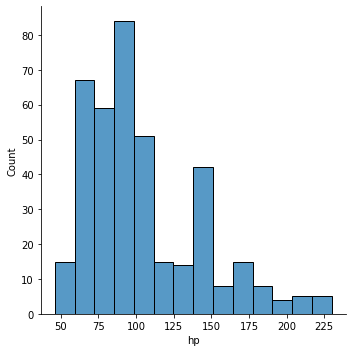

In [54]:
#sns.distplot(pd.to_numeric(hp))
sns.displot(pd.to_numeric(hp))

In [55]:
# Since this does not look to be normally distributed, let us impute by using median
auto_final['hp'].fillna((auto_final['hp'].median()),inplace=True)
auto_final['hp']=auto_final['hp'].astype('float')

In [56]:
#converted hp object data type to float by imputing values
auto_final.dtypes

mpg       float64
cyl         int64
disp      float64
hp        float64
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

### 3. Data analysis & visualisation: [ Score: 4 points ]

### • Perform detailed statistical analysis on the data.

In [57]:
auto_final.describe()

mpg         cyl        disp          hp           wt  \
count  398.000000  398.000000  398.000000  398.000000   398.000000   
mean    23.514573    5.454774  193.425879  104.304020  2970.424623   
std      7.815984    1.701004  104.269838   38.222625   846.841774   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.500000    4.000000  104.250000   76.000000  2223.750000   
50%     23.000000    4.000000  148.500000   93.500000  2803.500000   
75%     29.000000    8.000000  262.000000  125.000000  3608.000000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc          yr      origin  
count  398.000000  398.000000  398.000000  
mean    15.568090   76.010050    1.572864  
std      2.757689    3.697627    0.802055  
min      8.000000   70.000000    1.000000  
25%     13.825000   73.000000    1.000000  
50%     15.500000   76.000000    1.000000  
75%     17.175000   79.000000    2.000000  
max     24.800000   82.000000    3.000000

#### Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.

In [58]:
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
#subtract year from 83 to get the age

# Calculate age of vehicle
auto_final['age']=83-auto_final['yr']
auto_final.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  age
0  18.0    8  307.0  130.0  3504  12.0  70       1   13
1  15.0    8  350.0  165.0  3693  11.5  70       1   13
2  18.0    8  318.0  150.0  3436  11.0  70       1   13
3  16.0    8  304.0  150.0  3433  12.0  70       1   13
4  17.0    8  302.0  140.0  3449  10.5  70       1   13

In [59]:
# Origin as pointed earlier indicates production point so should be broken into dummy variables
#Convert origin into dummy variables (This again is subjected to business knowledge. We might drop this variable as well
# Inclusion is more to demonstrate on how to use categorical data)

one_hot=pd.get_dummies(auto_final['origin'])
one_hot=one_hot.add_prefix('origin_')

auto_final=auto_final.join(one_hot)
auto_final.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  age  origin_1  origin_2  \
0  18.0    8  307.0  130.0  3504  12.0  70       1   13         1         0   
1  15.0    8  350.0  165.0  3693  11.5  70       1   13         1         0   
2  18.0    8  318.0  150.0  3436  11.0  70       1   13         1         0   
3  16.0    8  304.0  150.0  3433  12.0  70       1   13         1         0   
4  17.0    8  302.0  140.0  3449  10.5  70       1   13         1         0   

   origin_3  
0         0  
1         0  
2         0  
3         0  
4         0

In [60]:
# Let us now remove duplicate/irrelevant columns

auto_new=auto_final.drop(['yr','origin'],axis=1)
auto_new.head()

mpg  cyl   disp     hp    wt   acc  age  origin_1  origin_2  origin_3
0  18.0    8  307.0  130.0  3504  12.0   13         1         0         0
1  15.0    8  350.0  165.0  3693  11.5   13         1         0         0
2  18.0    8  318.0  150.0  3436  11.0   13         1         0         0
3  16.0    8  304.0  150.0  3433  12.0   13         1         0         0
4  17.0    8  302.0  140.0  3449  10.5   13         1         0         0

<AxesSubplot:xlabel='origin'>

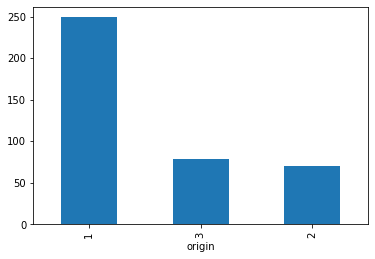

In [61]:
auto_final.value_counts(auto_final["origin"]).plot(kind="bar")
#pd.value_counts(df["class"]).plot(kind="bar")

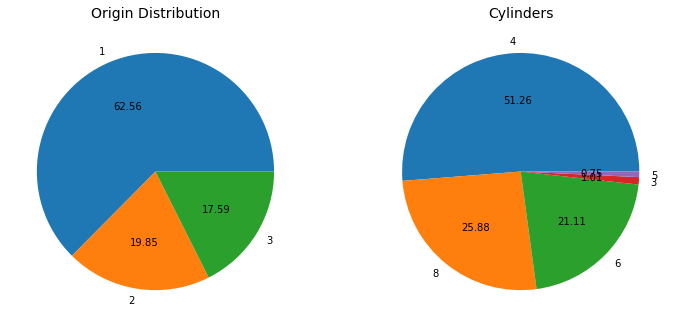

In [62]:
plt.figure(figsize=(12,12))
ax1=plt.subplot2grid((2,2),(0,0))
plt.pie(x=auto_final['origin'].value_counts(),autopct="%.2f",labels=['1','2','3'])
plt.title("Origin Distribution",fontsize=14)

ax1=plt.subplot2grid((2,2),(0,1))
plt.pie(x=auto_final['cyl'].value_counts(),autopct="%.2f",labels=auto_final['cyl'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title('Cylinders',size=14)

plt.show()

Text(0.5, 1.0, 'Consumption Gallon by Years')

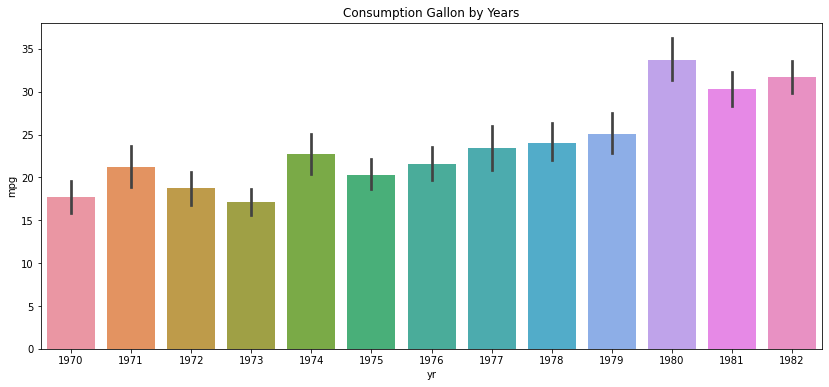

In [63]:
plt.figure(figsize=[14,6])
sns.barplot(x=auto_final['yr']+1900,y=auto_final['mpg'])
plt.title('Consumption Gallon by Years')

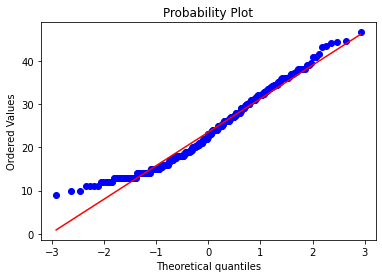

In [64]:
from scipy import stats
fig=plt.figure()
stats.probplot(auto_final['mpg'],plot=plt)
plt.show()

<AxesSubplot:xlabel='age'>

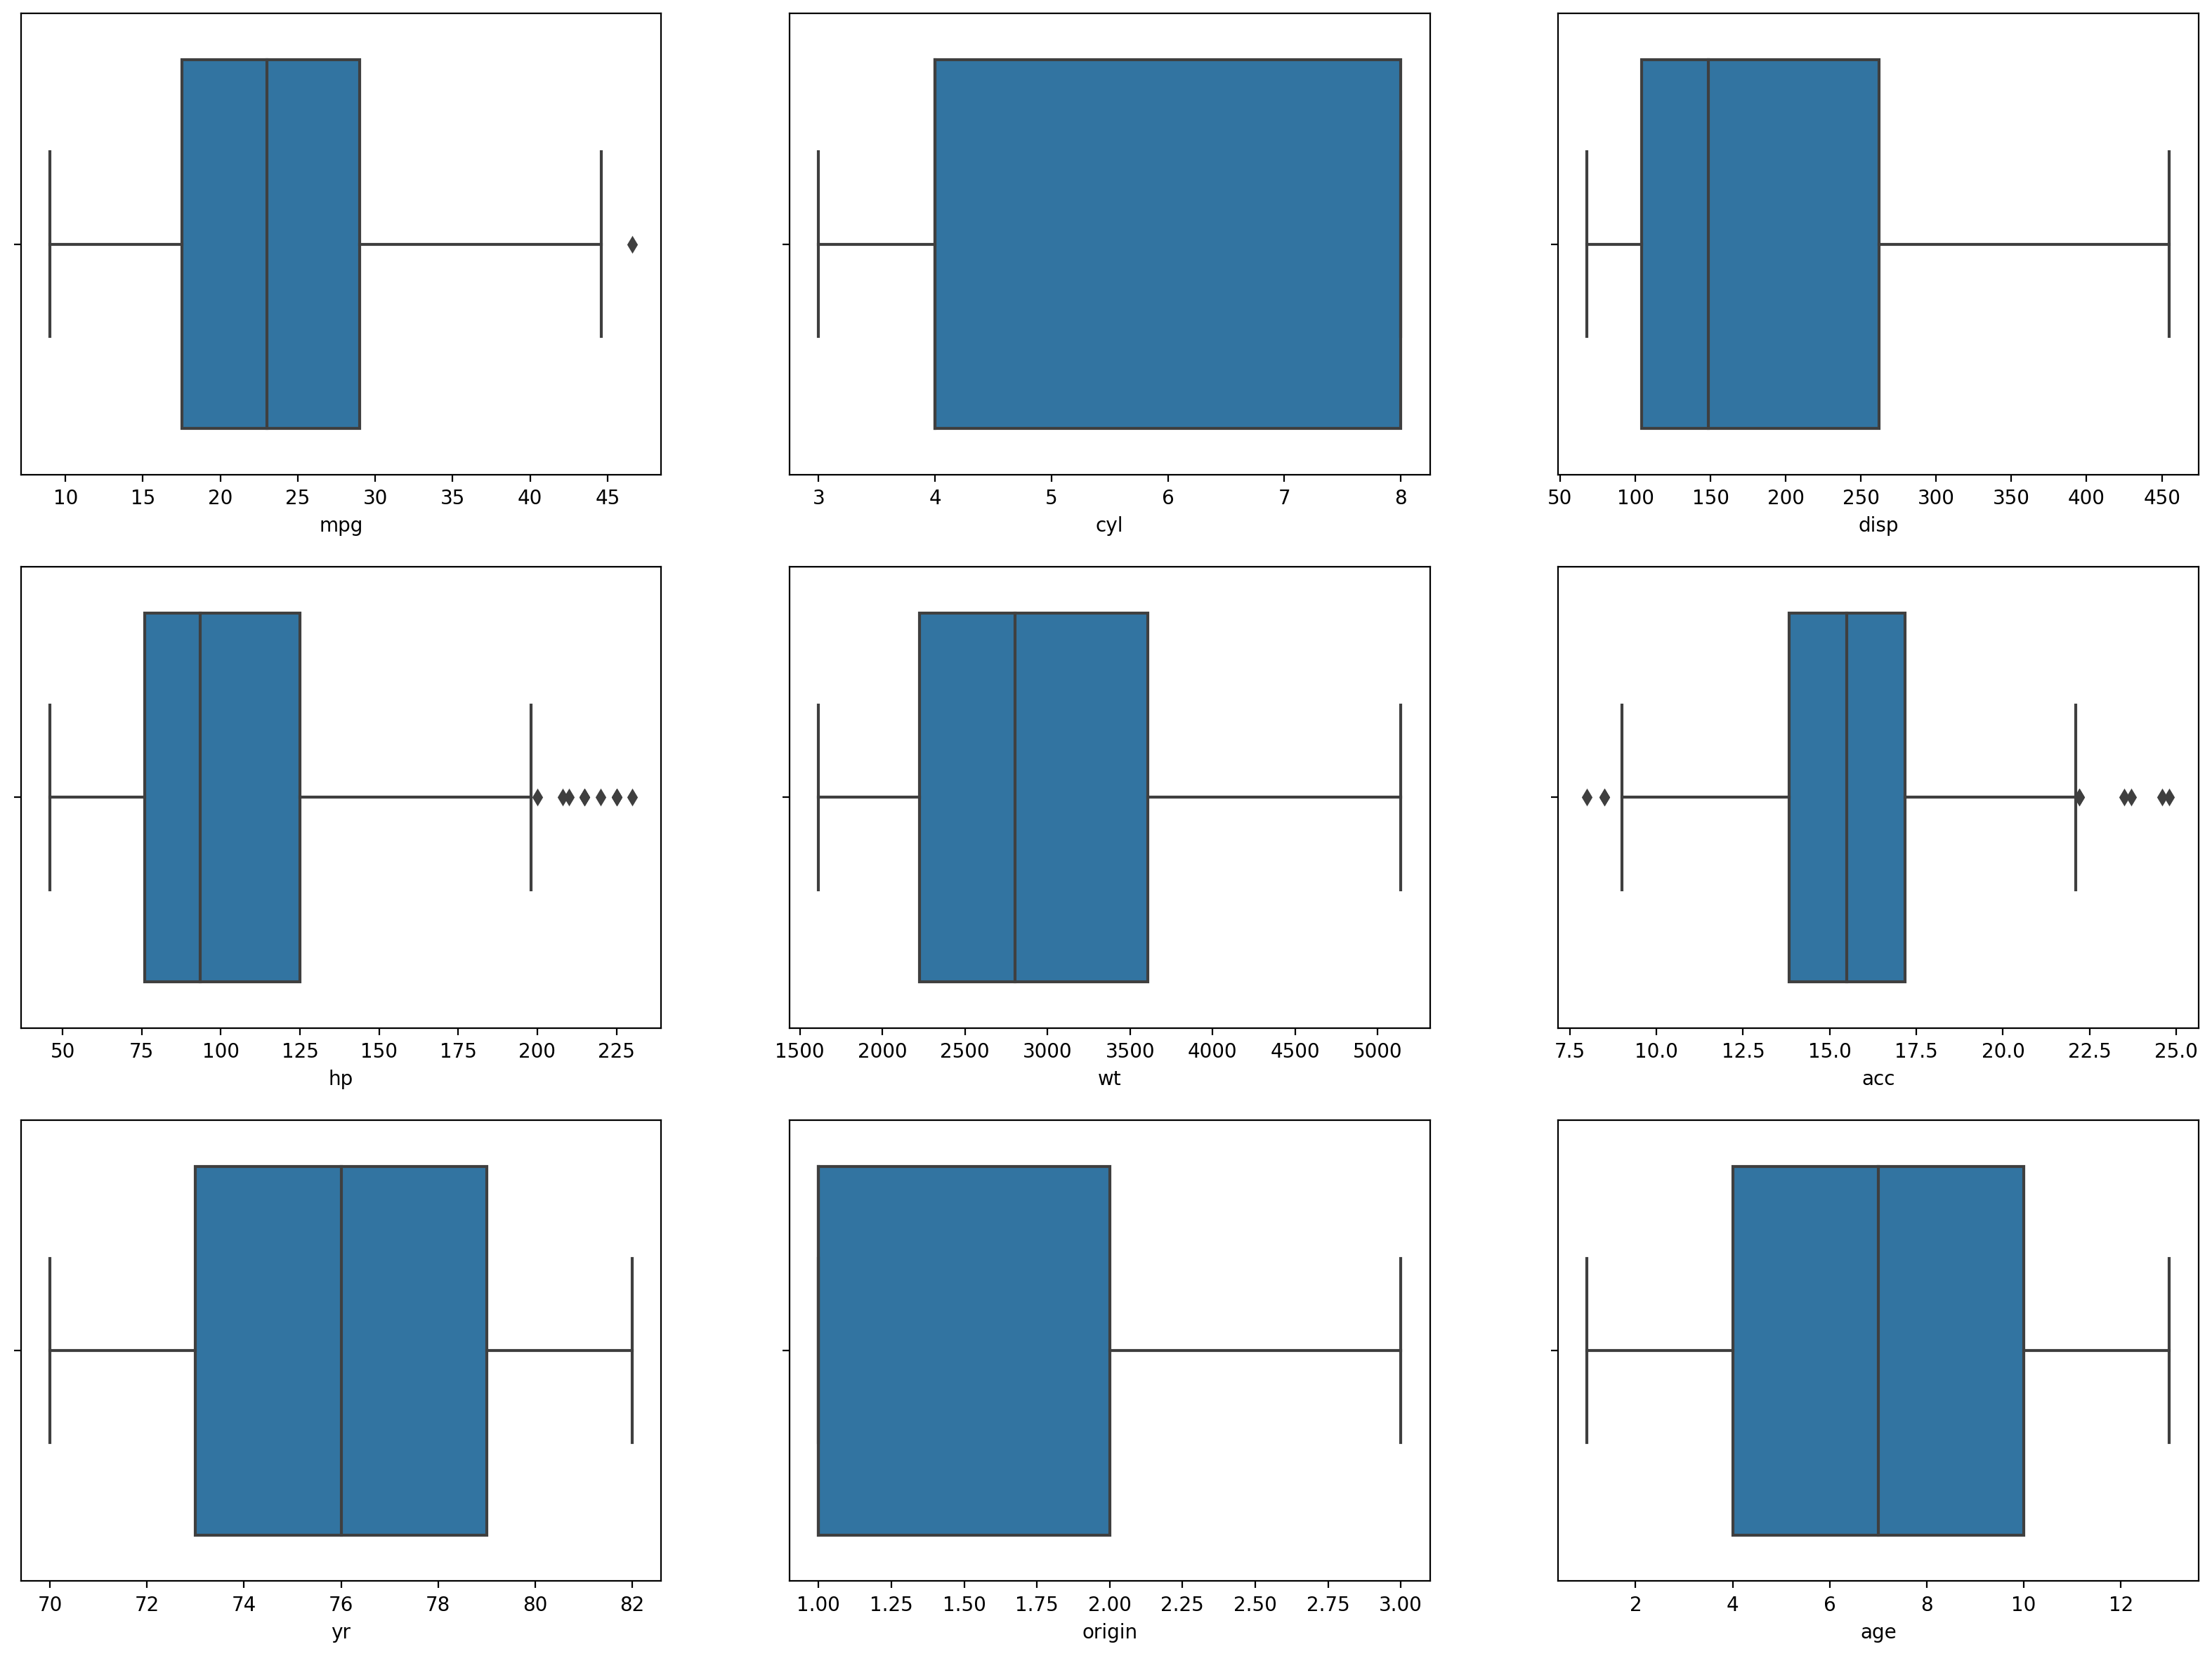

In [65]:
#Check for outliers

plt.figure(figsize=(20,20),dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x='mpg',data=auto_final)

plt.subplot(4,3,2)
sns.boxplot(x='cyl',data=auto_final)

plt.subplot(4,3,3)
sns.boxplot(x='disp',data=auto_final)

plt.subplot(4,3,4)
sns.boxplot(x='hp',data=auto_final)

plt.subplot(4,3,5)
sns.boxplot(x='wt',data=auto_final)

plt.subplot(4,3,6)
sns.boxplot(x='acc',data=auto_final)

plt.subplot(4,3,7)
sns.boxplot(x='yr',data=auto_final)

plt.subplot(4,3,8)
sns.boxplot(x='origin',data=auto_final)

plt.subplot(4,3,9)
sns.boxplot(x='age',data=auto_final)

When we look at their skewness
We see that Origin and Cylinders are far from normal distribution. But when we look at the data set, these features are actually categorical values. That's why I'm ignoring these two. I will change them as categoric in a soon
Weight, Displacement, Horsepower features has positive skew, we need deal with it
I'm not gonna handle "mpg" because it is target feature
Now let's change the data types of Origin and Cylinders categorically then updates the numerical_feat and categorical_feat variable with new ones

#### Bivariate Analysis

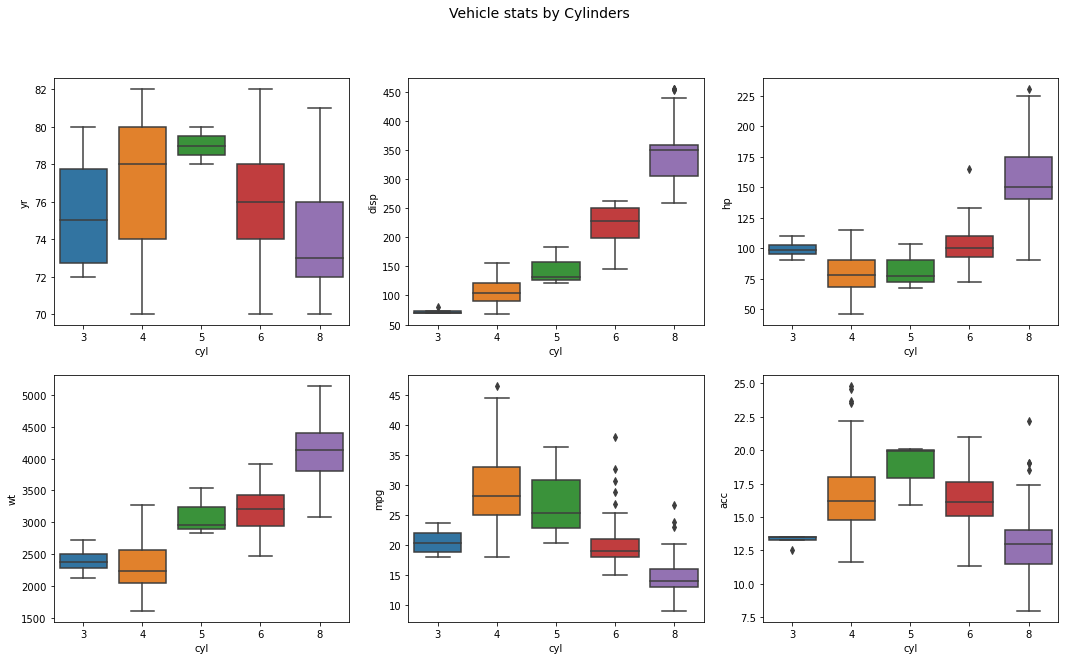

In [66]:
#Cars stats by cylinder
fig,axes=plt.subplots(2,3,figsize=(18,10))
fig.suptitle('Vehicle stats by Cylinders',size=14)

sns.boxplot(ax=axes[0,0],data=auto_final,x='cyl',y='yr')
sns.boxplot(ax=axes[0,1],data=auto_final,x='cyl',y='disp')
sns.boxplot(ax=axes[0,2],data=auto_final,x='cyl',y='hp')
sns.boxplot(ax=axes[1,0],data=auto_final,x='cyl',y='wt')
sns.boxplot(ax=axes[1,1],data=auto_final,x='cyl',y='mpg')
sns.boxplot(ax=axes[1,2],data=auto_final,x='cyl',y='acc')

plt.show()

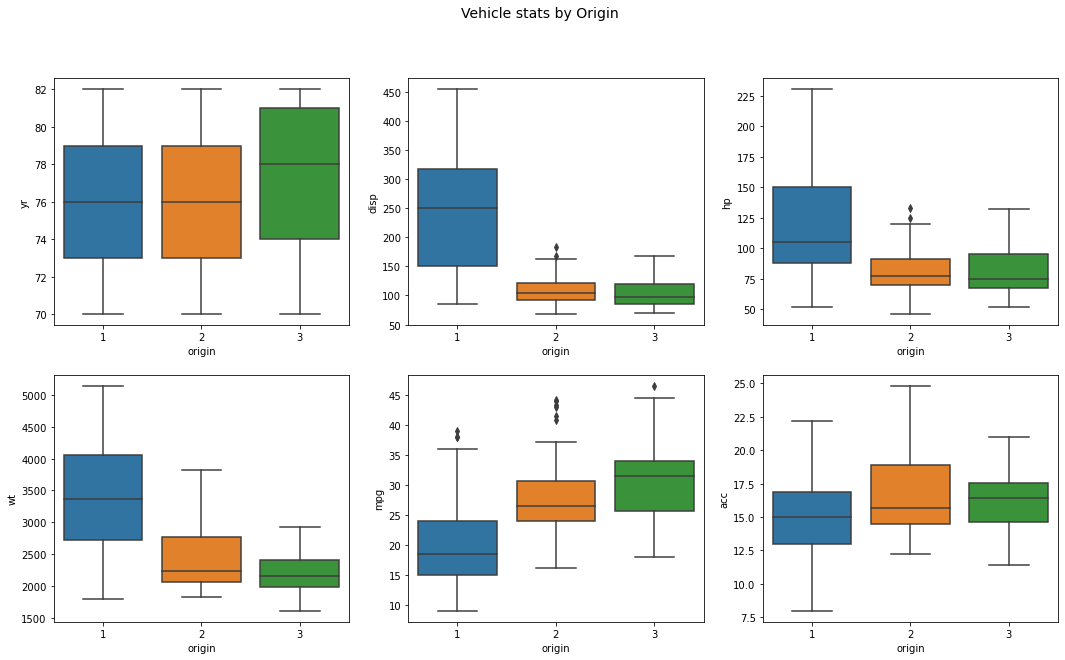

In [67]:
#Cars stats by origin
fig,axes=plt.subplots(2,3,figsize=(18,10))
fig.suptitle('Vehicle stats by Origin',size=14)

sns.boxplot(ax=axes[0,0],data=auto_final,x='origin',y='yr')
sns.boxplot(ax=axes[0,1],data=auto_final,x='origin',y='disp')
sns.boxplot(ax=axes[0,2],data=auto_final,x='origin',y='hp')
sns.boxplot(ax=axes[1,0],data=auto_final,x='origin',y='wt')
sns.boxplot(ax=axes[1,1],data=auto_final,x='origin',y='mpg')
sns.boxplot(ax=axes[1,2],data=auto_final,x='origin',y='acc')

plt.show()

#### Multivariate analysis

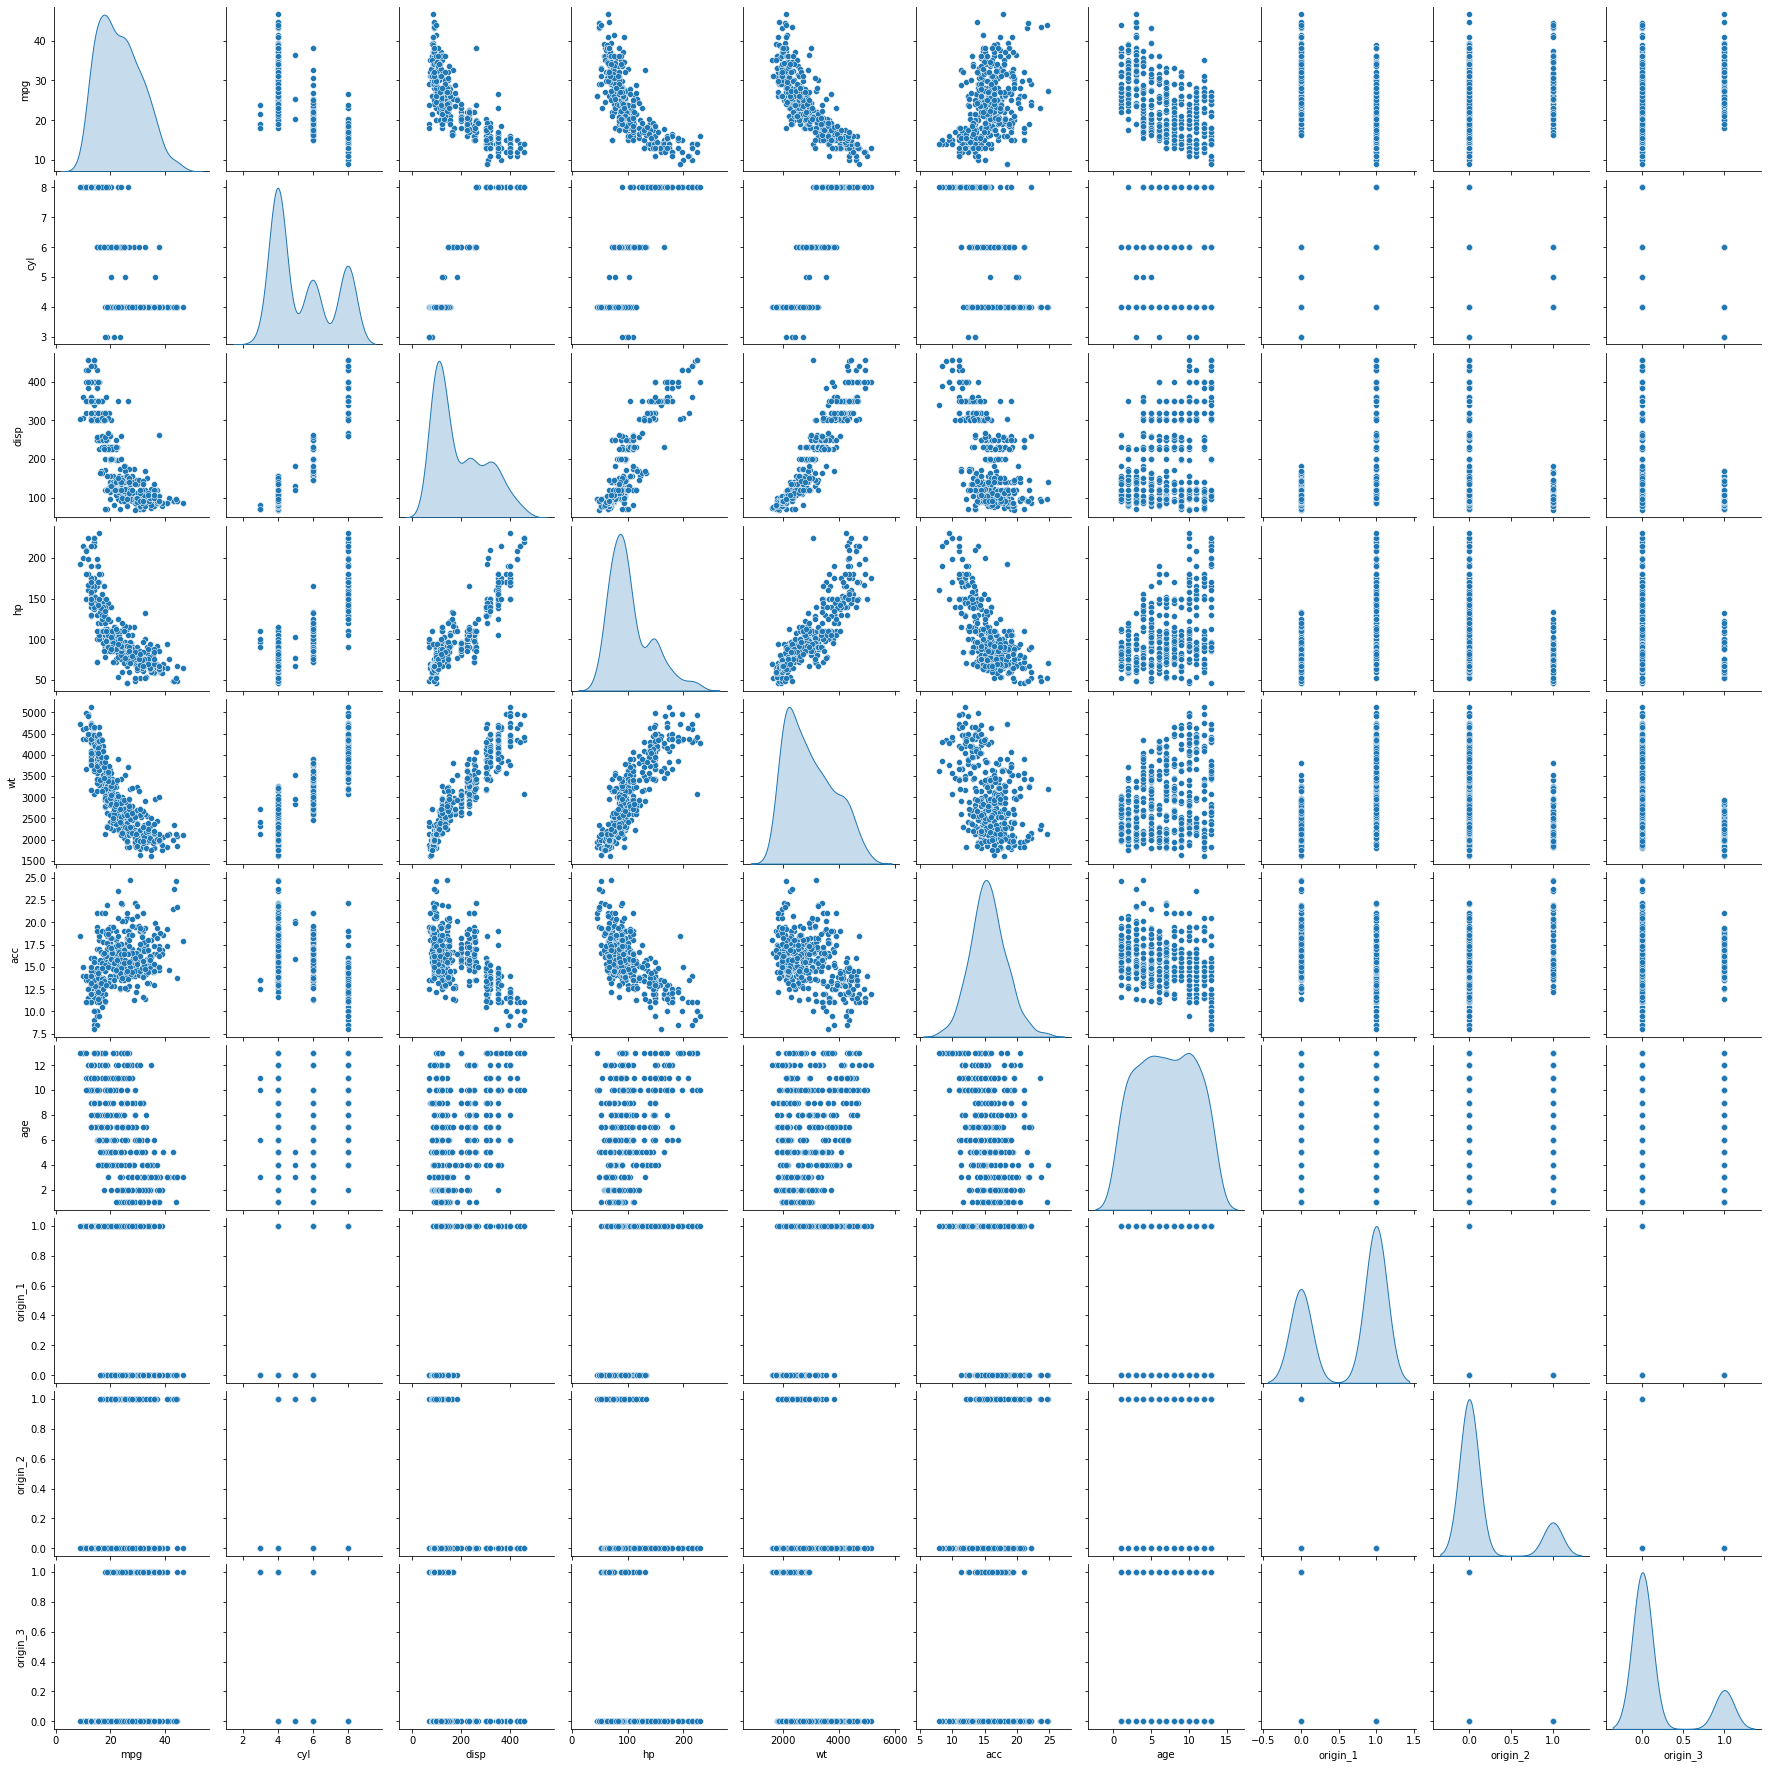

In [68]:
sns.pairplot(auto_new,diag_kind='kde')
#sns.pairplot(cardata,diag_kind='kde')

In [69]:
auto_final.corr()

mpg       cyl      disp        hp        wt       acc  \
mpg       1.000000 -0.775396 -0.804203 -0.773453 -0.831741  0.420289   
cyl      -0.775396  1.000000  0.950721  0.841284  0.896017 -0.505419   
disp     -0.804203  0.950721  1.000000  0.895778  0.932824 -0.543684   
hp       -0.773453  0.841284  0.895778  1.000000  0.862442 -0.686590   
wt       -0.831741  0.896017  0.932824  0.862442  1.000000 -0.417457   
acc       0.420289 -0.505419 -0.543684 -0.686590 -0.417457  1.000000   
yr        0.579267 -0.348746 -0.370164 -0.413733 -0.306564  0.288137   
origin    0.563450 -0.562543 -0.609409 -0.452096 -0.581024  0.205873   
age      -0.579267  0.348746  0.370164  0.413733  0.306564 -0.288137   
origin_1 -0.568192  0.604351  0.651407  0.485418  0.598398 -0.250806   
origin_2  0.259022 -0.352861 -0.373886 -0.282877 -0.298843  0.204473   
origin_3  0.442174 -0.396479 -0.433505 -0.318972 -0.440817  0.109144   

                yr    origin       age  origin_1  origin_2  origin_3  
mpg       0.579267  0.563450 -0.579267 -0.568192  0.259022  0.442174  
cyl      -0.348746 -0.562543  0.348746  0.604351 -0.352861 -0.396479  
disp     -0.370164 -0.609409  0.370164  0.651407 -0.373886 -0.433505  
hp       -0.413733 -0.452096  0.413733  0.485418 -0.282877 -0.318972  
wt       -0.306564 -0.581024  0.306564  0.598398 -0.298843 -0.440817  
acc       0.288137  0.205873 -0.288137 -0.250806  0.204473  0.109144  
yr        1.000000  0.180662 -1.000000 -0.139883 -0.024489  0.193101  
origin    0.180662  1.000000 -0.180662 -0.924486  0.246332  0.886596  
age      -1.000000 -0.180662  1.000000  0.139883  0.024489 -0.193101  
origin_1 -0.139883 -0.924486  0.139883  1.000000 -0.597198 -0.643317  
origin_2 -0.024489  0.246332  0.024489 -0.597198  1.000000 -0.229895  
origin_3  0.193101  0.886596 -0.193101 -0.643317 -0.229895  1.000000

<AxesSubplot:title={'center':'Pearson correlation of attributes'}>

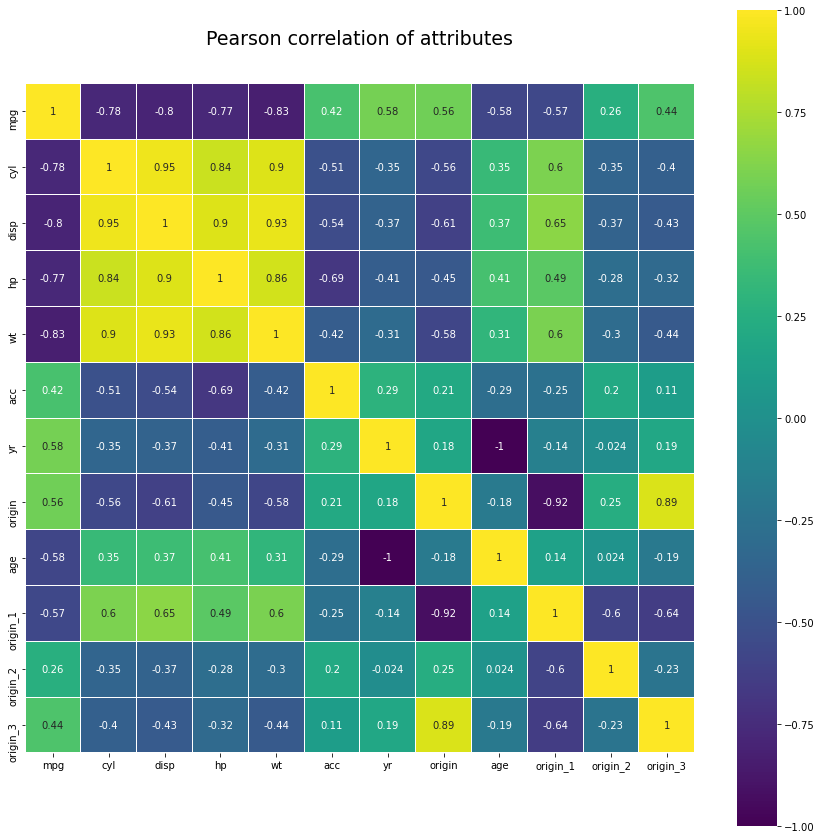

In [70]:
colormap=plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title("Pearson correlation of attributes",y=1.05,size=19)
sns.heatmap(auto_final.corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,linecolor='white',annot=True)

In [71]:
# Observations
# From diagonal plots we can see origin has 3 points (evident from data)
# yr - shows two peaks majorily
# acc,mpg are nearly normal
# cyl and disp shows 3 clusters while wt shows 2

# from bivariate plots we can see that mps shows negative liner relationship with wt,hp and disp 
# (correlation too gives high negative correlation)
# Cyl too shows negative correlation with lev

#### Dealing with outliers

In [72]:
auto_new.shape

(398, 10)

<AxesSubplot:>

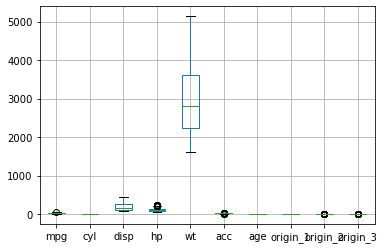

In [74]:
auto_new.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x1468ccd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1469a370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1468c970>],
 'medians': [<matplotlib.lines.Line2D at 0x1469aa30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1469ad90>],
 'means': []}

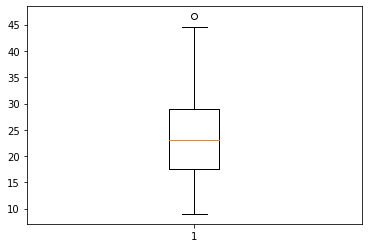

In [75]:
# We could see some outliers for mpg,hp and acc
plt.boxplot(auto_new['mpg'])

{'whiskers': [<matplotlib.lines.Line2D at 0x146e6ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x146f5580>,
 'boxes': [<matplotlib.lines.Line2D at 0x146e6b80>],
 'medians': [<matplotlib.lines.Line2D at 0x146f5c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x146f5fa0>],
 'means': []}

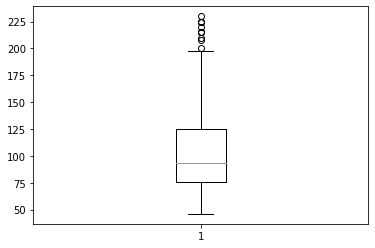

In [76]:
plt.boxplot(auto_new['hp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14751160>,
 'caps': [<matplotlib.lines.Line2D at 0x14751820>,
 'boxes': [<matplotlib.lines.Line2D at 0x14742dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x14751ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1475d280>],
 'means': []}

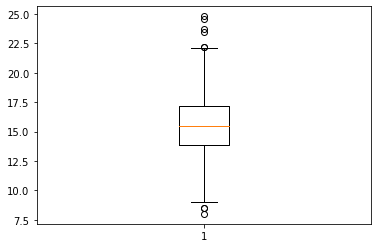

In [77]:
plt.boxplot(auto_new['acc'])

In [78]:
# Let us take logaritmic transform for hp,mpg and acc to remove outliers
auto_new['hp']=np.log(auto_new['hp'])
auto_new['acc']=np.log(auto_new['acc'])
auto_new['mpg']=np.log(auto_new['mpg'])

auto_new.head()

mpg  cyl   disp        hp    wt       acc  age  origin_1  origin_2  \
0  2.890372    8  307.0  4.867534  3504  2.484907   13         1         0   
1  2.708050    8  350.0  5.105945  3693  2.442347   13         1         0   
2  2.890372    8  318.0  5.010635  3436  2.397895   13         1         0   
3  2.772589    8  304.0  5.010635  3433  2.484907   13         1         0   
4  2.833213    8  302.0  4.941642  3449  2.351375   13         1         0   

   origin_3  
0         0  
1         0  
2         0  
3         0  
4         0

<AxesSubplot:>

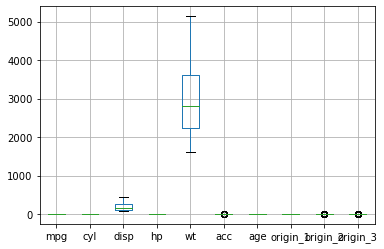

In [79]:
auto_new.boxplot()

In [80]:
auto_new.shape

(398, 10)

#### Scaling : Normalisation and Standardization

In [81]:
#Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
#go for any clustering methods. You can use zscore function to do this
#let us try to scale the variables
##In this method, we convert variables with different scales of measurements into a single scale.

from scipy.stats import zscore
auto_newZ=auto_new.apply(zscore)
auto_newZ.head()

mpg       cyl      disp        hp        wt       acc       age  \
0 -0.622035  1.498191  1.090604  0.823608  0.630870 -1.353748  1.627426   
1 -1.159493  1.498191  1.503514  1.523992  0.854333 -1.589535  1.627426   
2 -0.622035  1.498191  1.196232  1.243998  0.550470 -1.835805  1.627426   
3 -0.969242  1.498191  1.061796  1.243998  0.546923 -1.353748  1.627426   
4 -0.790530  1.498191  1.042591  1.041316  0.565841 -2.093533  1.627426   

   origin_1  origin_2  origin_3  
0  0.773559 -0.461968 -0.497643  
1  0.773559 -0.461968 -0.497643  
2  0.773559 -0.461968 -0.497643  
3  0.773559 -0.461968 -0.497643  
4  0.773559 -0.461968 -0.497643

In [82]:
#Normalization
#StandardScaler normalizes the data using the formula (x-mean)/standard deviation

from sklearn.preprocessing import StandardScaler
import numpy as np
sc=StandardScaler()
X_std=sc.fit_transform(auto_newZ)

In [83]:
X_std[:2]

array([[-0.62203476,  1.49819126,  1.0906037 ,  0.82360797,  0.63086987,
        -1.35374764,  1.62742629,  0.77355903, -0.46196822, -0.49764335],
       [-1.15949289,  1.49819126,  1.5035143 ,  1.5239923 ,  0.85433297,
        -1.58953476,  1.62742629,  0.77355903, -0.46196822, -0.49764335]])

### Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.

## 1. K means Clustering:

Group Data into similar clusters Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters and 5 clusters

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

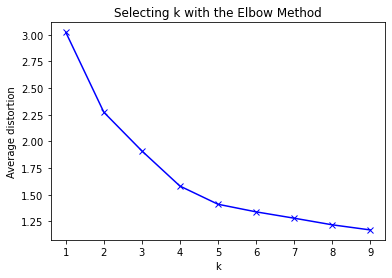

In [84]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_std)
    prediction=model.predict(X_std)
    meanDistortions.append(sum(np.min(cdist(X_std,model.cluster_centers_,'euclidean'),axis=1))/X_std.shape[0])
    
plt.plot(clusters,meanDistortions,'bx-')  
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [85]:
#Within Cluster Sum of Squares
model.inertia_

639.9217068438816

#### Forming clusters with K = 1,3,4,5 and comparing the WSS

In [94]:
k_means = KMeans(n_clusters = 3)
k_means.fit(X_std)
labels = k_means.labels_
k_means.inertia_

1628.2551716870378

In [95]:
k_means = KMeans(n_clusters = 4)
k_means.fit(X_std)
k_means.inertia_

1125.4869533390613

In [96]:
k_means = KMeans(n_clusters = 1)
k_means.fit(X_std)
k_means.inertia_

3980.000000000003

In [97]:
k_means = KMeans(n_clusters = 5)
k_means.fit(X_std)
k_means.inertia_

921.079084532357

#### Note:WSS reduces as K keeps increasing

In [98]:
# We could see the bend at 4, so let us create 4 custers
from sklearn.metrics import silhouette_score
final_model=KMeans(4)
final_model.fit(X_std)
prediction=final_model.predict(X_std)
S_Km1=silhouette_score(X_std,prediction)
print(f'Silhouette Score(n=4):{S_Km1}')

#Append the prediction
auto_new['Group']=prediction
auto_newZ['Group']=prediction
print("Groups Assigned:\n")
auto_new.head()

Silhouette Score(n=4):0.44554738863853055
Groups Assigned:



mpg  cyl   disp        hp    wt       acc  age  origin_1  origin_2  \
0  2.890372    8  307.0  4.867534  3504  2.484907   13         1         0   
1  2.708050    8  350.0  5.105945  3693  2.442347   13         1         0   
2  2.890372    8  318.0  5.010635  3436  2.397895   13         1         0   
3  2.772589    8  304.0  5.010635  3433  2.484907   13         1         0   
4  2.833213    8  302.0  4.941642  3449  2.351375   13         1         0   

   origin_3  Group  
0         0      1  
1         0      1  
2         0      1  
3         0      1  
4         0      1

In [99]:
from sklearn.metrics import silhouette_score
final_model=KMeans(3)
final_model.fit(X_std)
prediction=final_model.predict(X_std)
S_Km1=silhouette_score(X_std,prediction)
print(f'Silhouette Score(n=3):{S_Km1}')

Silhouette Score(n=3):0.3567115281549609


#### Note : silhouette score is better for 4 clusters than for 3 clusters. So, final clusters will be 4

#### Appending Clusters to the original dataset

In [100]:
auto_final["Clus_kmeans4"] = labels
auto_final.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  age  origin_1  origin_2  \
0  18.0    8  307.0  130.0  3504  12.0  70       1   13         1         0   
1  15.0    8  350.0  165.0  3693  11.5  70       1   13         1         0   
2  18.0    8  318.0  150.0  3436  11.0  70       1   13         1         0   
3  16.0    8  304.0  150.0  3433  12.0  70       1   13         1         0   
4  17.0    8  302.0  140.0  3449  10.5  70       1   13         1         0   

   origin_3  Clus_kmeans4  
0         0             0  
1         0             0  
2         0             0  
3         0             0  
4         0             0

#### Cluster Profiling

In [101]:
auto_final.Clus_kmeans4.value_counts().sort_index()

0    100
1    149
2    149
Name: Clus_kmeans4, dtype: int64

In [102]:
clust_profile=auto_final

clust_profile=clust_profile.groupby('Clus_kmeans4').mean()

clust_profile['freq']=auto_final.Clus_kmeans4.value_counts().sort_index()

clust_profile

mpg       cyl        disp          hp           wt  \
Clus_kmeans4                                                             
0             14.715000  7.980000  346.370000  160.550000  4126.910000   
1             29.248322  4.127517  105.731544   80.348993  2316.161074   
2             23.686577  5.087248  178.473154   90.510067  2848.523490   

                    acc         yr    origin       age  origin_1  origin_2  \
Clus_kmeans4                                                                 
0             12.721000  73.750000  1.000000  9.250000       1.0  0.000000   
1             16.461074  76.677852  2.530201  6.322148       0.0  0.469799   
2             16.585906  76.859060  1.000000  6.140940       1.0  0.000000   

              origin_3  freq  
Clus_kmeans4                  
0             0.000000   100  
1             0.530201   149  
2             0.000000   149

#### Check for no of values in each cluster and centers for each variables¶

In [103]:
# Check the number of data in each cluster

labels=final_model.labels_
counts=np.bincount(labels[labels>=0])
print(counts)

[100 149 149]


In [104]:
# Distribution looks fine.
# let us check the centers in each group
centroids = final_model.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(X_std[:1]) )
centroid_df.transpose()

0         1         2
-0.622035 -1.254864  0.106932  0.735258
 1.498191  1.486419 -0.216336 -0.781261
 1.090604  1.468657 -0.143585 -0.842091
 0.823608  1.406414 -0.275104 -0.668797
 0.630870  1.367364 -0.144129 -0.773565
-1.353748 -1.089934  0.395642  0.335857
 1.627426  0.611986 -0.229898 -0.180830
 0.773559  0.773559  0.773559 -1.292726
-0.461968 -0.461968 -0.461968  0.772014
-0.497643 -0.497643 -0.497643  0.831632

In [105]:
# Group 1 has highest values for mpg while 3rd has lowest
# Group 0 has max no of cylinders and 2 forms of lower cylinder values
# As seen in correlation and pairplot, Group 0 has highest values for hp,wt and displ
# Group 1 seems to be comprising of newest cars
# Group 3 and 0 seems to be originated at point 3, while 2 in 2nd point and 1 again at point 3

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'age'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[Group]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'origin_1'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'origin_2'}, xlabel='[Group]'>],
       [<AxesSubplot:title={'center':'origin_3'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[Group]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

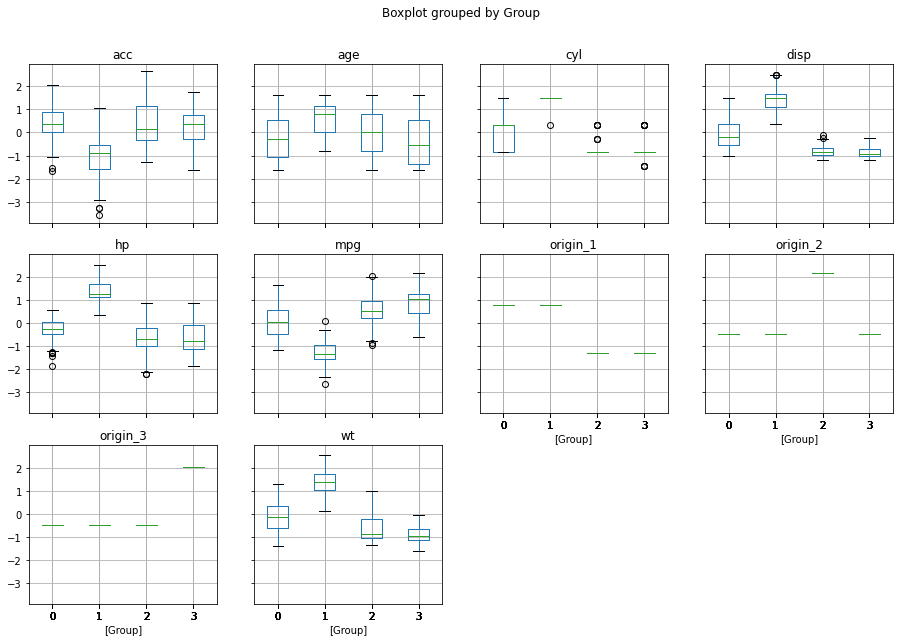

In [106]:
# Visualize the centers
auto_newZ.boxplot(by='Group',layout=(3,4),figsize=(15,10))

In [452]:
# Group 0 is characterised by lower acc, comparitely old models, higher wt, hp but lowest mpg with origin at 1
# Group 1 -Highest mpg, lower wt and hp. Lower age limits suggest comparitevly newer cars. Origin looks more 2
# Group 2 - Origin mostly in location 2, lower deviation in wts, and hp so medain mpg and acceleration
# Group 3 - Again slighlty higher in wt origin code as 1. Better performance in terms of mpg

### 2. Hierarchical clustering 

#### Create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [62]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[98,])
c = np.random.multivariate_normal([0, 30], [[3, 1], [1, 4]], size=[100,])
d = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])
#d=np.random.multivariate_normal([10,20]),[[[3,1],[1,4]],size=[100,]]

In [63]:
X = np.concatenate((a, b, c,d), axis=0)
print(X.shape)  # 250 samples with 2 dimensions

(398, 2)


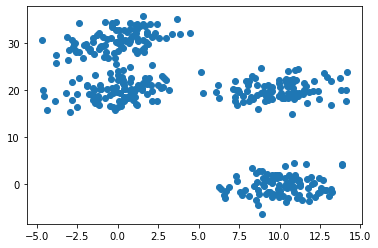

In [64]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [65]:
from sklearn.cluster import AgglomerativeClustering 
model_Hr= AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')
model_Hr.fit(X_std)
prediction=model_Hr.fit_predict(X_std)
S_Hr1=silhouette_score(X_std,prediction)
print(f'Silhouette Score(n=4):{S_Hr1}')

Silhouette Score(n=4):0.44463331360825137


In [66]:
auto_new['labels'] = model_Hr.labels_
auto_new.head(10)

#custDataAttr.groupby(["labels"]).count()

mpg  cyl   disp        hp    wt       acc  age  origin_1  origin_2  \
0  2.890372    8  307.0  4.867534  3504  2.484907   13         1         0   
1  2.708050    8  350.0  5.105945  3693  2.442347   13         1         0   
2  2.890372    8  318.0  5.010635  3436  2.397895   13         1         0   
3  2.772589    8  304.0  5.010635  3433  2.484907   13         1         0   
4  2.833213    8  302.0  4.941642  3449  2.351375   13         1         0   
5  2.708050    8  429.0  5.288267  4341  2.302585   13         1         0   
6  2.639057    8  454.0  5.393628  4354  2.197225   13         1         0   
7  2.639057    8  440.0  5.370638  4312  2.140066   13         1         0   
8  2.639057    8  455.0  5.416100  4425  2.302585   13         1         0   
9  2.708050    8  390.0  5.247024  3850  2.140066   13         1         0   

   origin_3  Group  labels  
0         0      0       3  
1         0      0       3  
2         0      0       3  
3         0      0       3  
4         0      0       3  
5         0      0       3  
6         0      0       3  
7         0      0       3  
8         0      0       3  
9         0      0       3

In [67]:
auto_Clust=auto_new.groupby(['labels'])

#custDataClust = custDataAttr.groupby(['labels'])

In [68]:
auto_Clust.mean()
#custDataClust.mean()

mpg       cyl        disp        hp           wt       acc  \
labels                                                                    
0       3.300572  4.157143  109.142857  4.363103  2423.300000  2.805579   
1       3.138630  5.087248  179.077181  4.494390  2852.114094  2.801448   
2       3.395316  4.101266  102.708861  4.356344  2221.227848  2.775970   
3       2.674250  7.980000  345.470000  5.064643  4121.560000  2.531369   

             age  origin_1  origin_2  origin_3     Group  
labels                                                    
0       7.185714         0         1         0  3.000000  
1       6.134228         1         0         0  1.986577  
2       5.556962         0         0         1  1.000000  
3       9.260000         1         0         0  0.020000

In [69]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

Z=linkage(X_std,metric='euclidean',method='average')
c,coph_dists=cophenet(Z,pdist(X_std))
c

0.7748329107238573

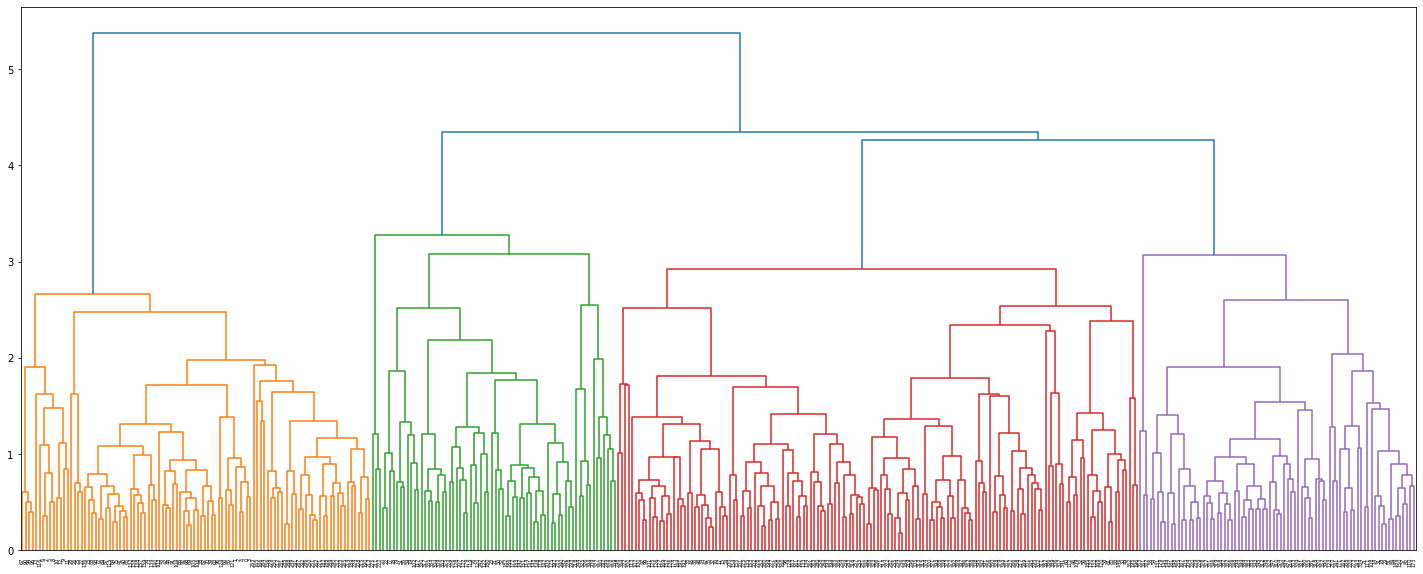

In [70]:
plt.figure(figsize=(25,10))
dendrogram(Z)
plt.show()

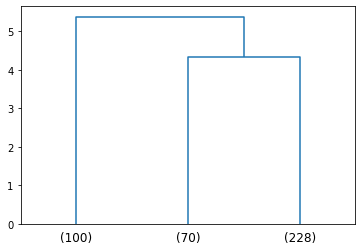

In [71]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [72]:
max_d = 98

Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups

In [73]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Use matplotlib to visually observe the clusters in 2D space

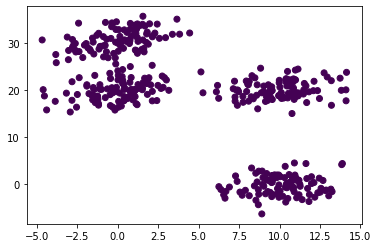

In [74]:
#### plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters)  # plot points with cluster dependent colors
plt.show()

#### • Share your insights about the difference in using these two methods.

In [76]:
final_model=KMeans(3)
final_model.fit(X_std)
prediction=final_model.predict(X_std)
S_Km3=silhouette_score(X_std,prediction)
print(f'Silhouette Score(n=3):{S_Km3}')

Silhouette Score(n=3):0.3567115281549609


In [77]:
final_model=KMeans(5)
final_model.fit(X_std)
prediction=final_model.predict(X_std)
S_Km5=silhouette_score(X_std,prediction)
print(f'Silhouette Score(n=5):{S_Km5}')

Silhouette Score(n=5):0.4107416861290223


In [78]:
from sklearn.cluster import AgglomerativeClustering 
model_Hr= AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model_Hr.fit(X_std)
prediction=model_Hr.fit_predict(X_std)
S_Hr3=silhouette_score(X_std,prediction)
print(f'Silhouette Score(n=3):{S_Hr3}')

Silhouette Score(n=3):0.3408986819915669


In [79]:
from sklearn.cluster import AgglomerativeClustering 
model_Hr= AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')
model_Hr.fit(X_std)
prediction=model_Hr.fit_predict(X_std)
S_Hr5=silhouette_score(X_std,prediction)
print(f'Silhouette Score(n=5):{S_Hr5}')

Silhouette Score(n=5):0.4154224598905159


In [80]:
models=pd.DataFrame({'Model':['K-means','Agglomerative'],
                     'Silhoette Score(K=3)':[S_Km3,S_Hr3],
                    'Silhoette Score(K=4(optimal))':[S_Km1,S_Hr1],
                     'Silhoette Score(K=5)':[S_Km5,S_Hr5]
                    })
models.sort_index()

Model  Silhoette Score(K=3)  Silhoette Score(K=4(optimal))  \
0        K-means              0.356712                       0.445547   
1  Agglomerative              0.340899                       0.444633   

   Silhoette Score(K=5)  
0              0.410742  
1              0.415422

#### • Share your insights about the difference in using these two methods.

#### 5. Answer below questions based on outcomes of using ML based methods. [ Score: 5 points ]

#### • Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

There are four clusters present in the data. silhouette score is better for 4 clusters than for 3 clusters and 5 clusters. 
Elbow method also shows optimal value for k=4. It indicates that the underlying model fits best at that point.

#### • Use linear regression model on different clusters separately and print the coefficients of the models individually

In [107]:
X=auto_new.iloc[:,:-1]
y=auto_new.iloc[:,-1]

In [108]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [109]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [110]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00315457 -0.8282469  -0.86084321 -0.84831171 -0.88211364  0.47389506
  -0.55901612 -0.5609494   0.25288192  0.43993228]
 [-0.8282469   1.00315457  0.95593488  0.83659527  0.89650703 -0.53388117
   0.32695387  0.5968256  -0.34578532 -0.39525982]
 [-0.86084321  0.95593488  1.00315457  0.88404187  0.93496531 -0.581453
   0.35065638  0.64263105 -0.3632191  -0.43423484]
 [-0.84831171  0.83659527  0.88404187  1.00315457  0.87395426 -0.72801762
   0.37351882  0.5092082  -0.29855548 -0.33388059]
 [-0.88211364  0.89650703  0.93496531  0.87395426  1.00315457 -0.44875688
   0.27880443  0.59189281 -0.28429652 -0.44762761]
 [ 0.47389506 -0.53388117 -0.581453   -0.72801762 -0.44875688  1.00315457
  -0.31661073 -0.25982463  0.21318306  0.11262822]
 [-0.55901612  0.32695387  0.35065638  0.37351882  0.27880443 -0.31661073
   1.00315457  0.10228619  0.06003824 -0.18094465]
 [-0.5609494   0.5968256   0.64263105  0.5092082   0.59189281 -0.25982463
   0.10228619  1.00315457 -0.59

In [111]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 58.4457145   71.83332216  83.92556844  91.03239799  96.76434628
  98.50212974  99.19884659  99.72193121 100.         100.        ]


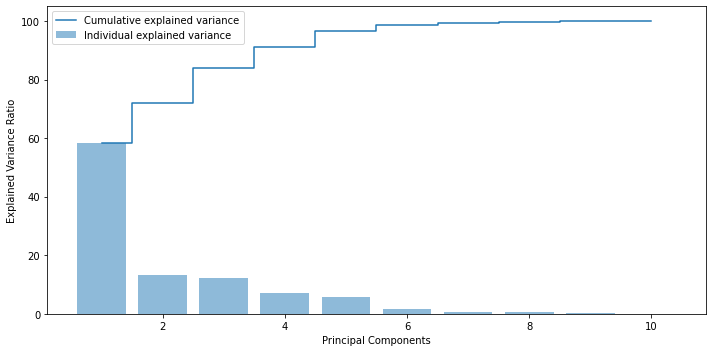

In [112]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [113]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(5.863008584173822,
  array([-0.37972312,  0.38485763,  0.39968254,  0.38181806,  0.38404978,
         -0.25900084,  0.17865402,  0.29557183, -0.15866983, -0.20768255])),
 (1.3429839856160684,
  array([ 0.14444713,  0.03052264,  0.02663898, -0.03333786, -0.00868815,
          0.03408486, -0.46910057,  0.30999948, -0.74229034,  0.32862609])),
 (1.2130392169955704,
  array([ 0.04581136, -0.02700611, -0.01957045, -0.19423772,  0.04731402,
          0.4349635 , -0.29722399,  0.46193686,  0.11838976, -0.67222388])),
 (0.71292485719748,
  array([ 0.17377997,  0.12172835,  0.11065658,  0.21503577,  0.17127665,
         -0.32980721, -0.74772628, -0.25367208,  0.36525816, -0.03913242])),
 (0.5750030144716729,
  array([-0.23965338,  0.23495961,  0.15215753, -0.03005936,  0.37241128,
          0.71521565, -0.10766453, -0.31449428,  0.07307488,  0.311838  ]))]

In [117]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(10,1), 
                      eigen_pairs[1][1].reshape(10,1)))
print('Matrix W:\n', w)
X_sd_pca = X_train_sd.dot(w)
X_test_sd_pca = X_test_sd.dot(w)

Matrix W:
 [[-0.37972312  0.14444713]
 [ 0.38485763  0.03052264]
 [ 0.39968254  0.02663898]
 [ 0.38181806 -0.03333786]
 [ 0.38404978 -0.00868815]
 [-0.25900084  0.03408486]
 [ 0.17865402 -0.46910057]
 [ 0.29557183  0.30999948]
 [-0.15866983 -0.74229034]
 [-0.20768255  0.32862609]]


In [123]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
#from sklearn.linear_model import regression_model

model = LinearRegression()
model.fit(X_train_sd, y_train)
print ('Before PCA score', model.score(X_test_sd, y_test))

model.fit(X_sd_pca, y_train)
print ('After PCA score', model.score(X_test_sd_pca, y_test))


Before PCA score 0.9670918363414435
After PCA score 0.2627106276923228


In [129]:
b1 = model.coef_
b0 = model.intercept_
print("b1 is: {} and b0 is: {}".format(b1, b0))

b1 is: [-0.21920807 -0.1794748 ] and b0 is: 1.1886792452830186


#### • How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.

#### 6. Improvisation: [ Score: 2 points ]

#### • Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to perform a better data analysis in future.

1. Unsupervsed machine learning requires a good qaulity of data to be processed, although not labeled. Because, a proper
data preparation approach drives "right" business insights by improving their accuracy.
2. Both the algorithams should be chosen depending on a particular business case, not on the popularity of a specific approach
and trends.
3. K means only works if the structure of the dataset is spherical. If there is overlapping between clusters, kmeans doesn't 
have an intrinsic measure for uncertainty for the examples belong to the overlapping region in order to determine for which 
cluster to assign each data point. In this case, we can use hierarchical clustering.
4. Heirarchical clustering doesnt work with missing data. It works poorly with mixed data types, it doesnt work well on very
large data sets, and its main output, the dendrogram is commonly misinterpreted. so, the better alternative is latent class
analysis.

## Part 2: Domain: Manufacturing

Impyute and FancyImpute are libraries specially designed for smart imputations. 
Two are their best techniques are: KNN and MICE(Multivariate Imputation by Chained Equations) 
MICE considers the feauter with missing values as a dependent variable, and the remaining features as the predictors.
From these multiple fitted models, MICE picks up the best ones and imputes using them.
KNN finds the similar values of the nearest neighbors and imputes its average.
i am using KNN for categorical data 

In [184]:
wine_df=pd.read_excel("Part2 - Company.xlsx")
wine_df.head(5)

A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A

In [185]:
print(wine_df.shape)
print(wine_df.size)

(61, 5)
305


In [186]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [187]:
wine_df.isnull().values.any()

True

In [188]:
wine_df.isna().values.any()

True

In [189]:
wine_df.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

In [190]:
#total elements for Quality A and Quality B before imputing values
print(wine_df.Quality.value_counts())

Quality A    26
Quality B    17
Name: Quality, dtype: int64


In [191]:
wine_df['Quality']=wine_df['Quality'].replace(to_replace=['Quality A','Quality B'],value=['0','1'])

In [192]:
wine_df['Quality'].value_counts()

0    26
1    17
Name: Quality, dtype: int64

In [193]:
wine_df.dtypes

A           int64
B           int64
C           int64
D           int64
Quality    object
dtype: object

In [194]:
#convert object data type into integer data type
def convert_to_integer(feature):
    wine_df[feature]=pd.to_numeric(wine_df[feature],errors='coerce')

In [195]:
convert_to_integer('Quality')

In [196]:
wine_df.dtypes

A            int64
B            int64
C            int64
D            int64
Quality    float64
dtype: object

In [197]:
from sklearn.preprocessing import StandardScaler

In [198]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [199]:
scaled_df = X.fit_transform(wine_df.iloc[:,1:4])

In [200]:
scaled_df

array([[-1.56107975, -1.06156947, -0.10313846],
       [ 0.28492275,  0.30607663,  0.82301347],
       [ 0.80737629,  0.32144344,  0.26412869],
       [-1.63074022, -1.70697549, -1.1250992 ],
       [-0.98638086, -1.61477463, -0.74186392],
       [ 0.40682857,  0.61341283,  1.34996198],
       [-1.54366463, -0.55446474, -1.47639821],
       [ 0.47648905,  0.44437792,  0.63139583],
       [ 1.12084841,  1.22808523,  1.01463111],
       [ 1.06860306,  0.67488007,  0.42381005],
       [-0.39426685, -0.10882725, -1.23687616],
       [ 1.45173565,  0.59804602,  1.23818502],
       [-0.18528544, -0.87716775, -1.23687616],
       [-0.70773897, -0.89253456, -0.91751343],
       [ 0.44165881,  0.49047835,  0.95075856],
       [ 0.49390416,  0.79781455,  0.28009682],
       [-0.96896574, -0.6466656 , -0.26281982],
       [-0.13304008, -0.60056517, -1.28478057],
       [ 0.94669723,  0.75171412,  1.22221689],
       [ 1.06860306,  0.78244774,  0.99866297],
       [ 1.12084841,  0.42901111,  0.823

In [201]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2)
# Fit K means on the scaled_df
k_means.fit(scaled_df)
# Get the labels
k_means.labels_

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [202]:
#Within Cluster Sum of Squares¶
k_means.inertia_

33.84967761219432

In [203]:
#Calculating WSS for other values of K - Elbow Method
wss =[] 

In [204]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [205]:
wss

[183.00000000000006,
 33.84967761219432,
 26.413220308556184,
 22.292399007817917,
 18.67558771416105,
 15.196927157348522,
 13.69212085574703,
 11.284298512624103,
 10.107981898121697,
 8.729376454631785]

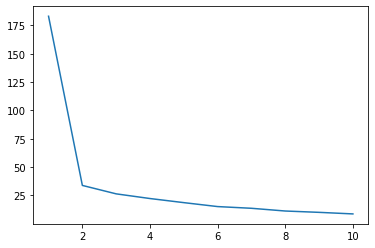

In [206]:
plt.plot(range(1,11), wss)

In [207]:
from sklearn.metrics import silhouette_samples, silhouette_score
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
labels = k_means.labels_

# Calculating silhouette_score
silhouette_score(scaled_df,labels)

0.6912298316608351

In [208]:
wine_df["Clus_kmeans4"] = labels
wine_df.head()

A    B    C    D  Quality  Clus_kmeans4
0   47   27   45  108      0.0             1
1  174  133  134  166      1.0             0
2  159  163  135  131      NaN             0
3   61   23    3   44      0.0             1
4   59   60    9   68      0.0             1

In [209]:
#wine_df.drop(['Quality'],axis=1)

In [210]:
#Cluster Profiling
wine_df.Clus_kmeans4.value_counts().sort_index()

0    33
1    28
Name: Clus_kmeans4, dtype: int64

In [211]:
clust_profile=wine_df.drop(['Quality'],axis=1)

clust_profile=clust_profile.groupby('Clus_kmeans4').mean()

clust_profile['freq']=wine_df.Clus_kmeans4.value_counts().sort_index()

clust_profile

A           B           C           D  freq
Clus_kmeans4                                                     
0             169.30303  163.909091  168.666667  166.606061    33
1              58.75000   60.928571   49.750000   53.000000    28

#### Compare the clusters with the existing target and find if they follow similar pattern. If you find a similar pattern replace the newly predicted cluster with original missing targets from dataset

Conclusion : 
They dont follow the same attern.By comparing the predicted column with the existing one, It shows the different output for 
every row.
We cant replece the newly predicted cluster with original missing targets from dataset as it doesnt follow the pattern.

### Part 3: DOMAIN: Automobile

### 1. Data: Import, clean and pre-process the data

In [214]:
veh_df=pd.read_csv("Part3 - vehicle.csv")
veh_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [215]:
print(veh_df.shape)
print(veh_df.size)

(846, 19)
16074


In [216]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [217]:
veh_df.isnull().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
class                          False
dtype: bool

In [218]:
veh_df.isnull().sum()
#cData_12.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [219]:
veh_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

Data preprocessing: instead of droppinfg the rows, lets replce the missing values with median. we dont have to specify the 
column names below. Every column's missing value is replace with that column's median respectively.

In [220]:
veh_df=veh_df.fillna(veh_df.median())

In [221]:
#checking null values now
veh_df.isna().apply(pd.value_counts)

compactness  circularity  distance_circularity  radius_ratio  \
False          846          846                   846           846   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   846                      846            846   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            846                     846                        846   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              846                846                        846   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          846             846               846   

       skewness_about.2  hollows_ratio  class  
False               846            846    846

In [222]:
#checking dupicate values
veh_df.duplicated().sum()

0

In [223]:
veh_df=veh_df.replace({'class':{'car':0,'bus':1,'van':2}})
veh_df['class'].value_counts()

0    429
1    218
2    199
Name: class, dtype: int64

In [224]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

#### 2. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods. For example: Use your best analytical approach to build this report. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.

In [225]:
veh_df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        846.000000     846.000000  846.000000  
mean         188.918440     195.632388    0.728132  
std            6.152247       7.438797    0.818044  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    0.000000  
50%          188.000000     197.000000    0.000000  
75%          193.000000     201.000000    1.000000  
max          206.000000     211.000000    2.000000

<AxesSubplot:xlabel='class'>

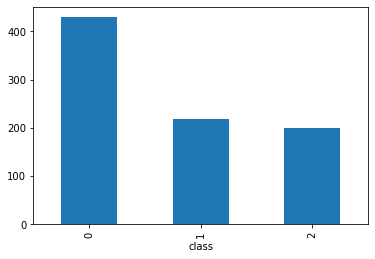

In [226]:
veh_df.value_counts(veh_df["class"]).plot(kind="bar")

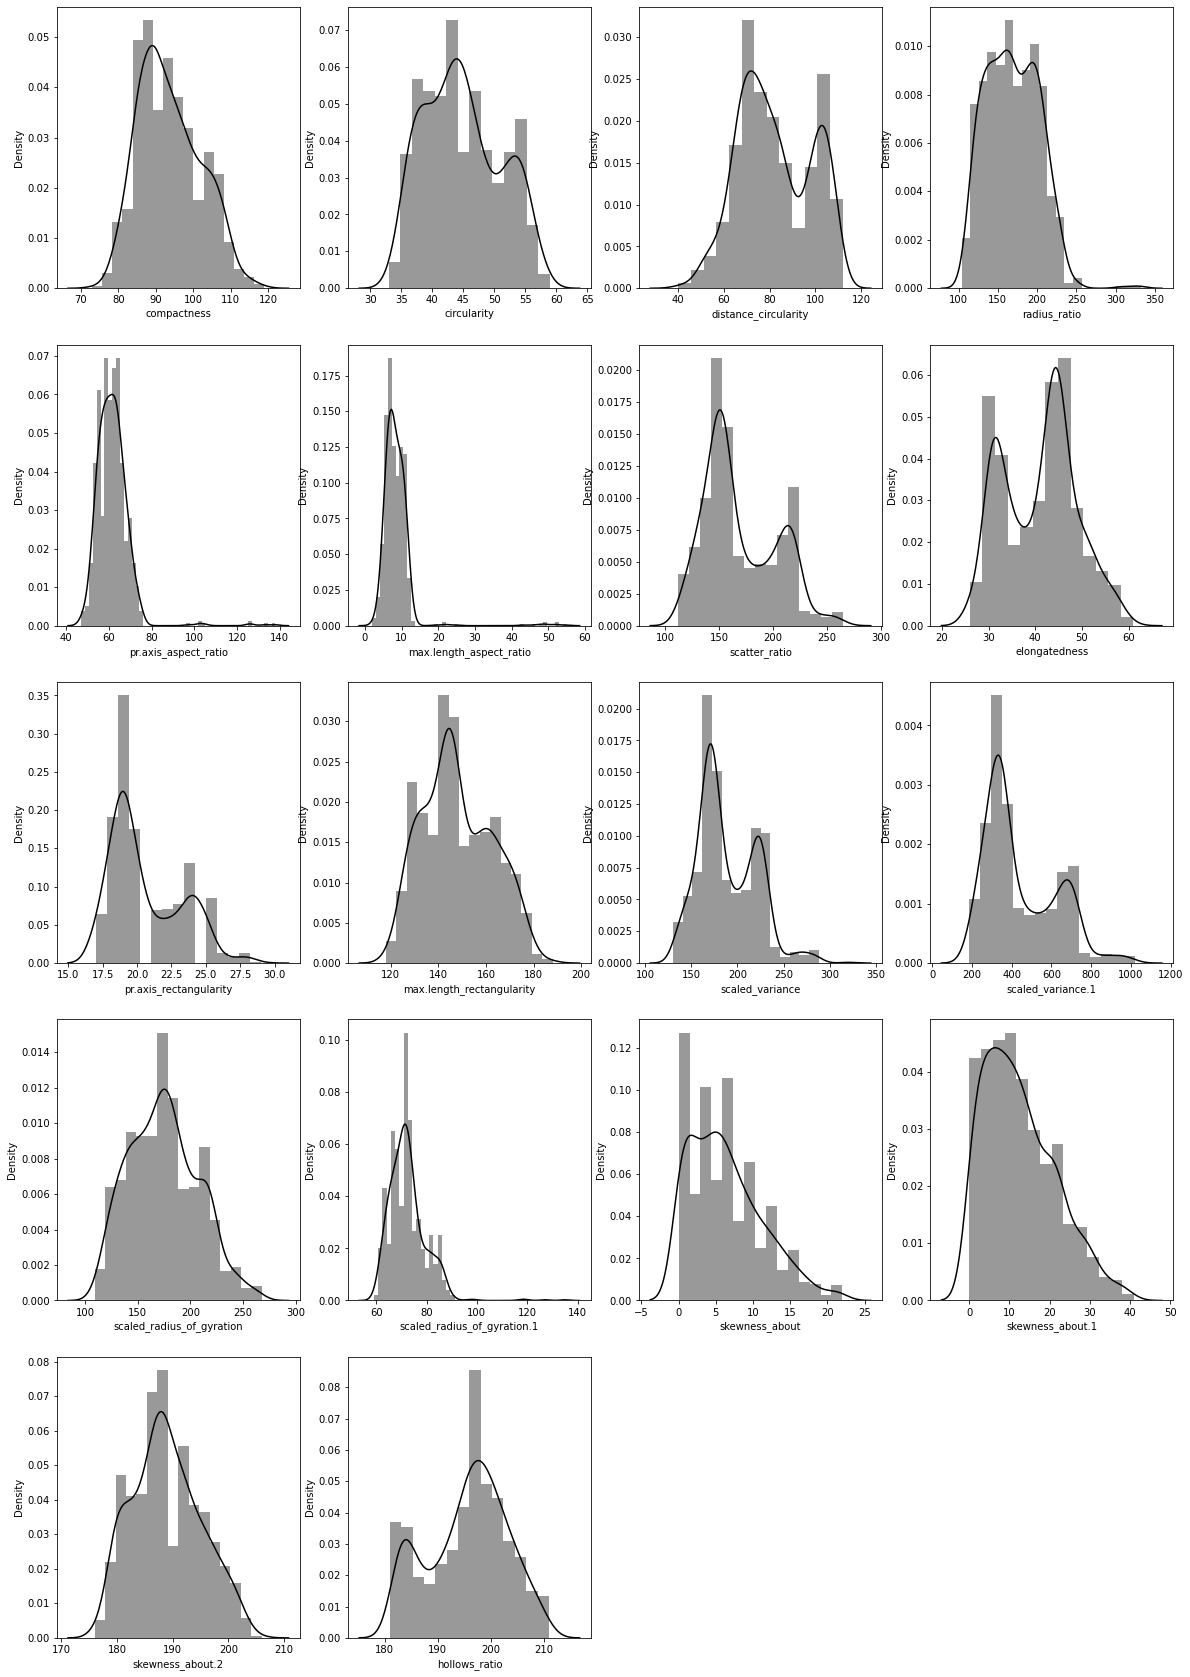

In [227]:
k=1
plt.figure(figsize=(20,30))
for col in veh_df.columns[0:18]:
    plt.subplot(5,4,k)
    sns.distplot(veh_df[col],color='black')
    k=k+1

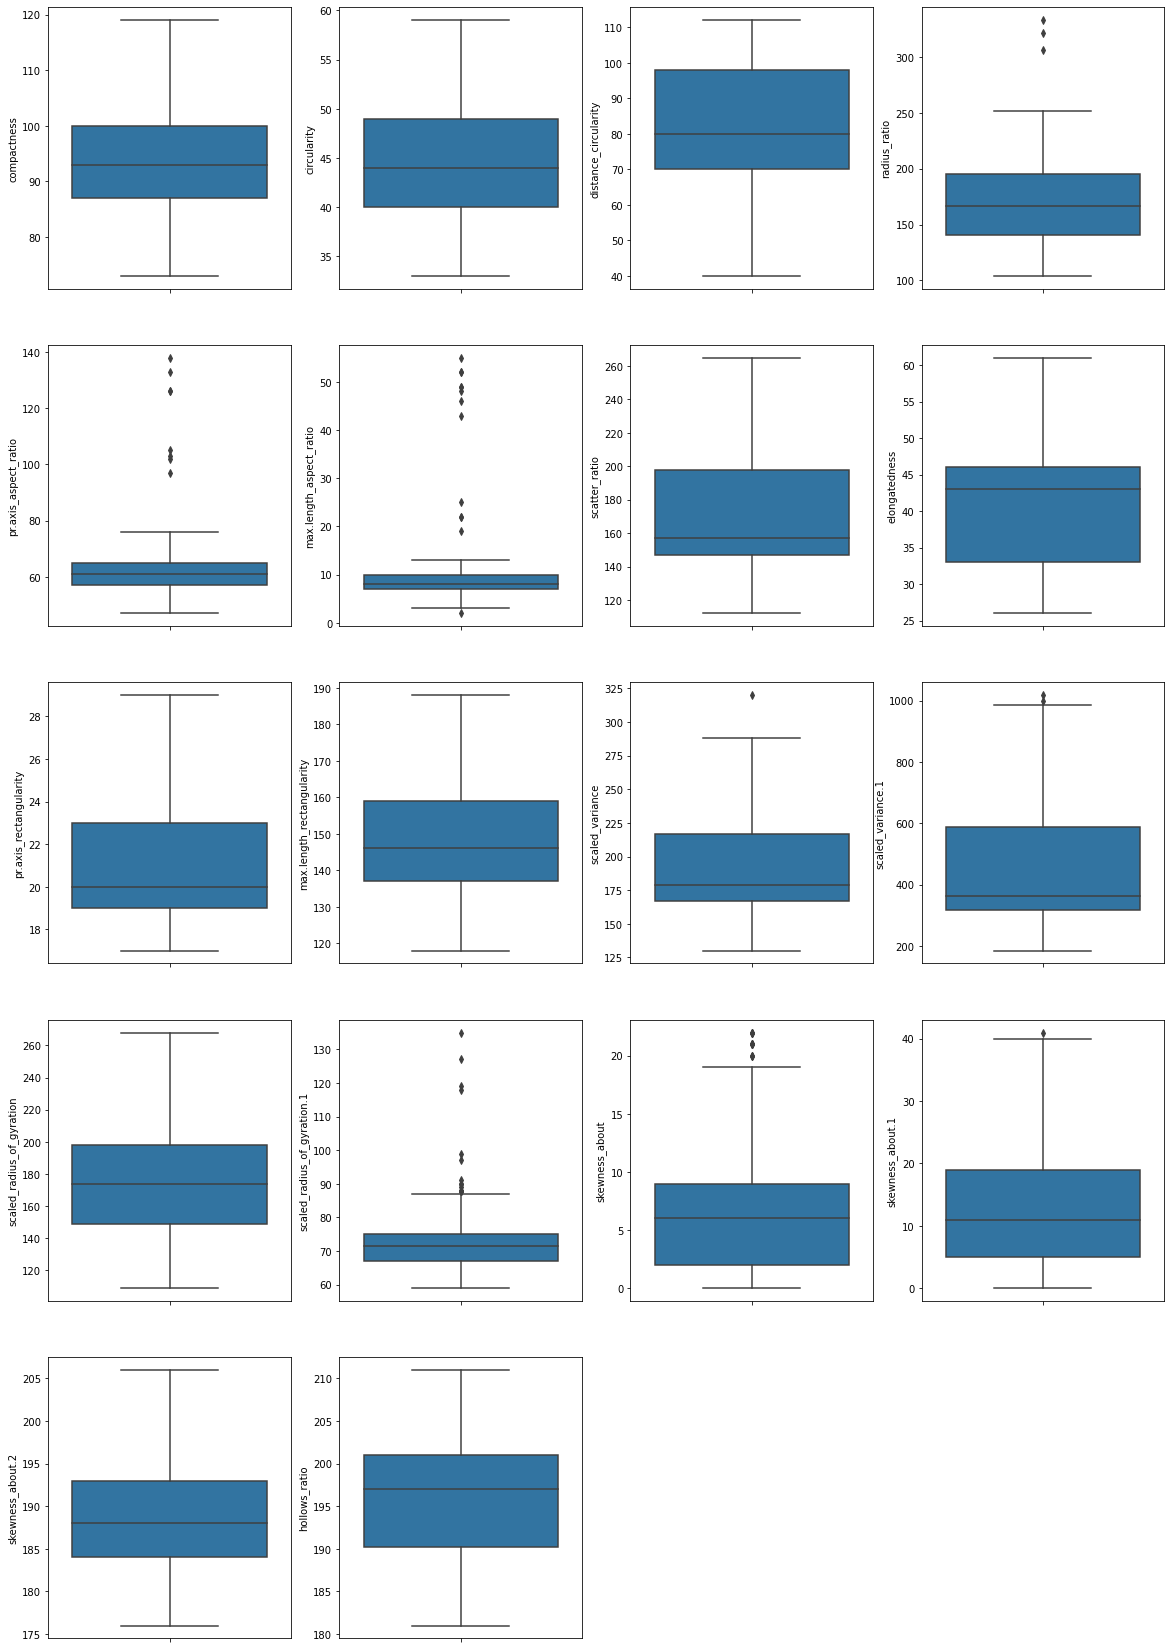

In [228]:
k=1
plt.figure(figsize=(20,30))
for col in veh_df.columns[0:18]:
    plt.subplot(5,4,k)
    sns.boxplot(y=veh_df[col])
    k=k+1

Observations:
    1. There are no outliers in compactness and circularity columns and they looks like nrmally distributed.
    2. There are no outliers in the distance_circularity column but we can see that there is right skewness as the tail towards
    the right side.(mean>median)
    3. We can see that there are there are outliers in radius_ratio and max_length_aspect_ratio columns and there is positive 
    skewness because the long tail is on the right side(mean>median)
    4. We can analyse that in the columns scaled_cariance,scaled_variance.1,scaled_radius_of_gyration.1,skewness_about
    and skewness_about.1 are having outliers and right skewed.
    5. Columns except previous point even though seems not having outliers but they are highly skewed to the right, there are 
    more than one peaks in the distribution.
    6. After seeing that there are outliers present in the columns, we can treat the outliers with metric 

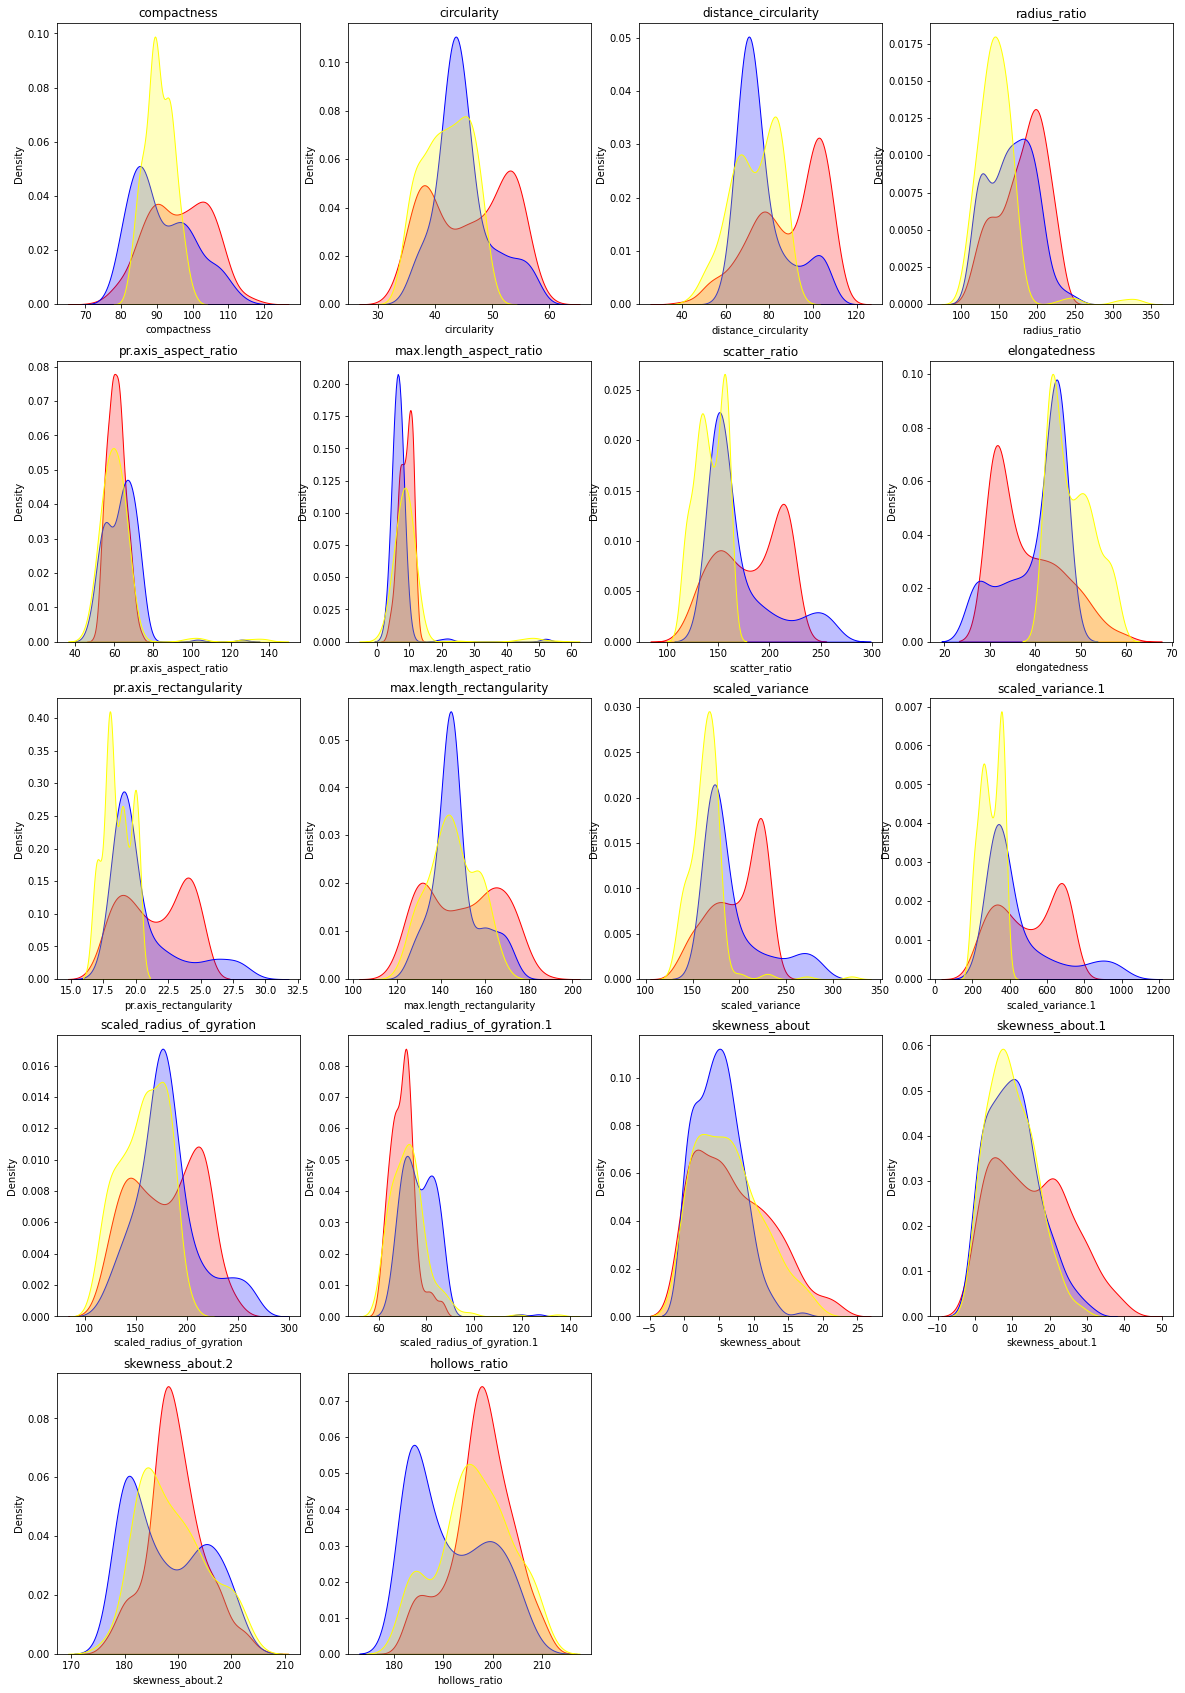

In [229]:
k=1
plt.figure(figsize=(20,30))
for col in veh_df.columns[0:18]:
    plt.subplot(5,4,k)
    sns.kdeplot(veh_df[veh_df['class']==0][col],color='red',label='car',shade=True)
    sns.kdeplot(veh_df[veh_df['class']==1][col],color='blue',label='bus',shade=True)
    sns.kdeplot(veh_df[veh_df['class']==2][col],color='yellow',label='van',shade=True)
    plt.title(col)
    k=k+1

Observations:
    1.Spread of compactness is least for van. mean compactness is highest for car. for bus compactness is right skewed indicating 
    that less number of buses have high compactness.
    2. Mean circularity is higher for cars.
    3. Mean distance_circularity is also higher for cars.
    4. pr.axis_aspect_ratio has almost same distribution for car,van and buses
    5.'scaled_radius_of_gyration','scaled_radius_of_gyration.1','skewness_about','skewness_about.1','skewness_about.2' have almost
    similar distribution for cars,buses and vans.

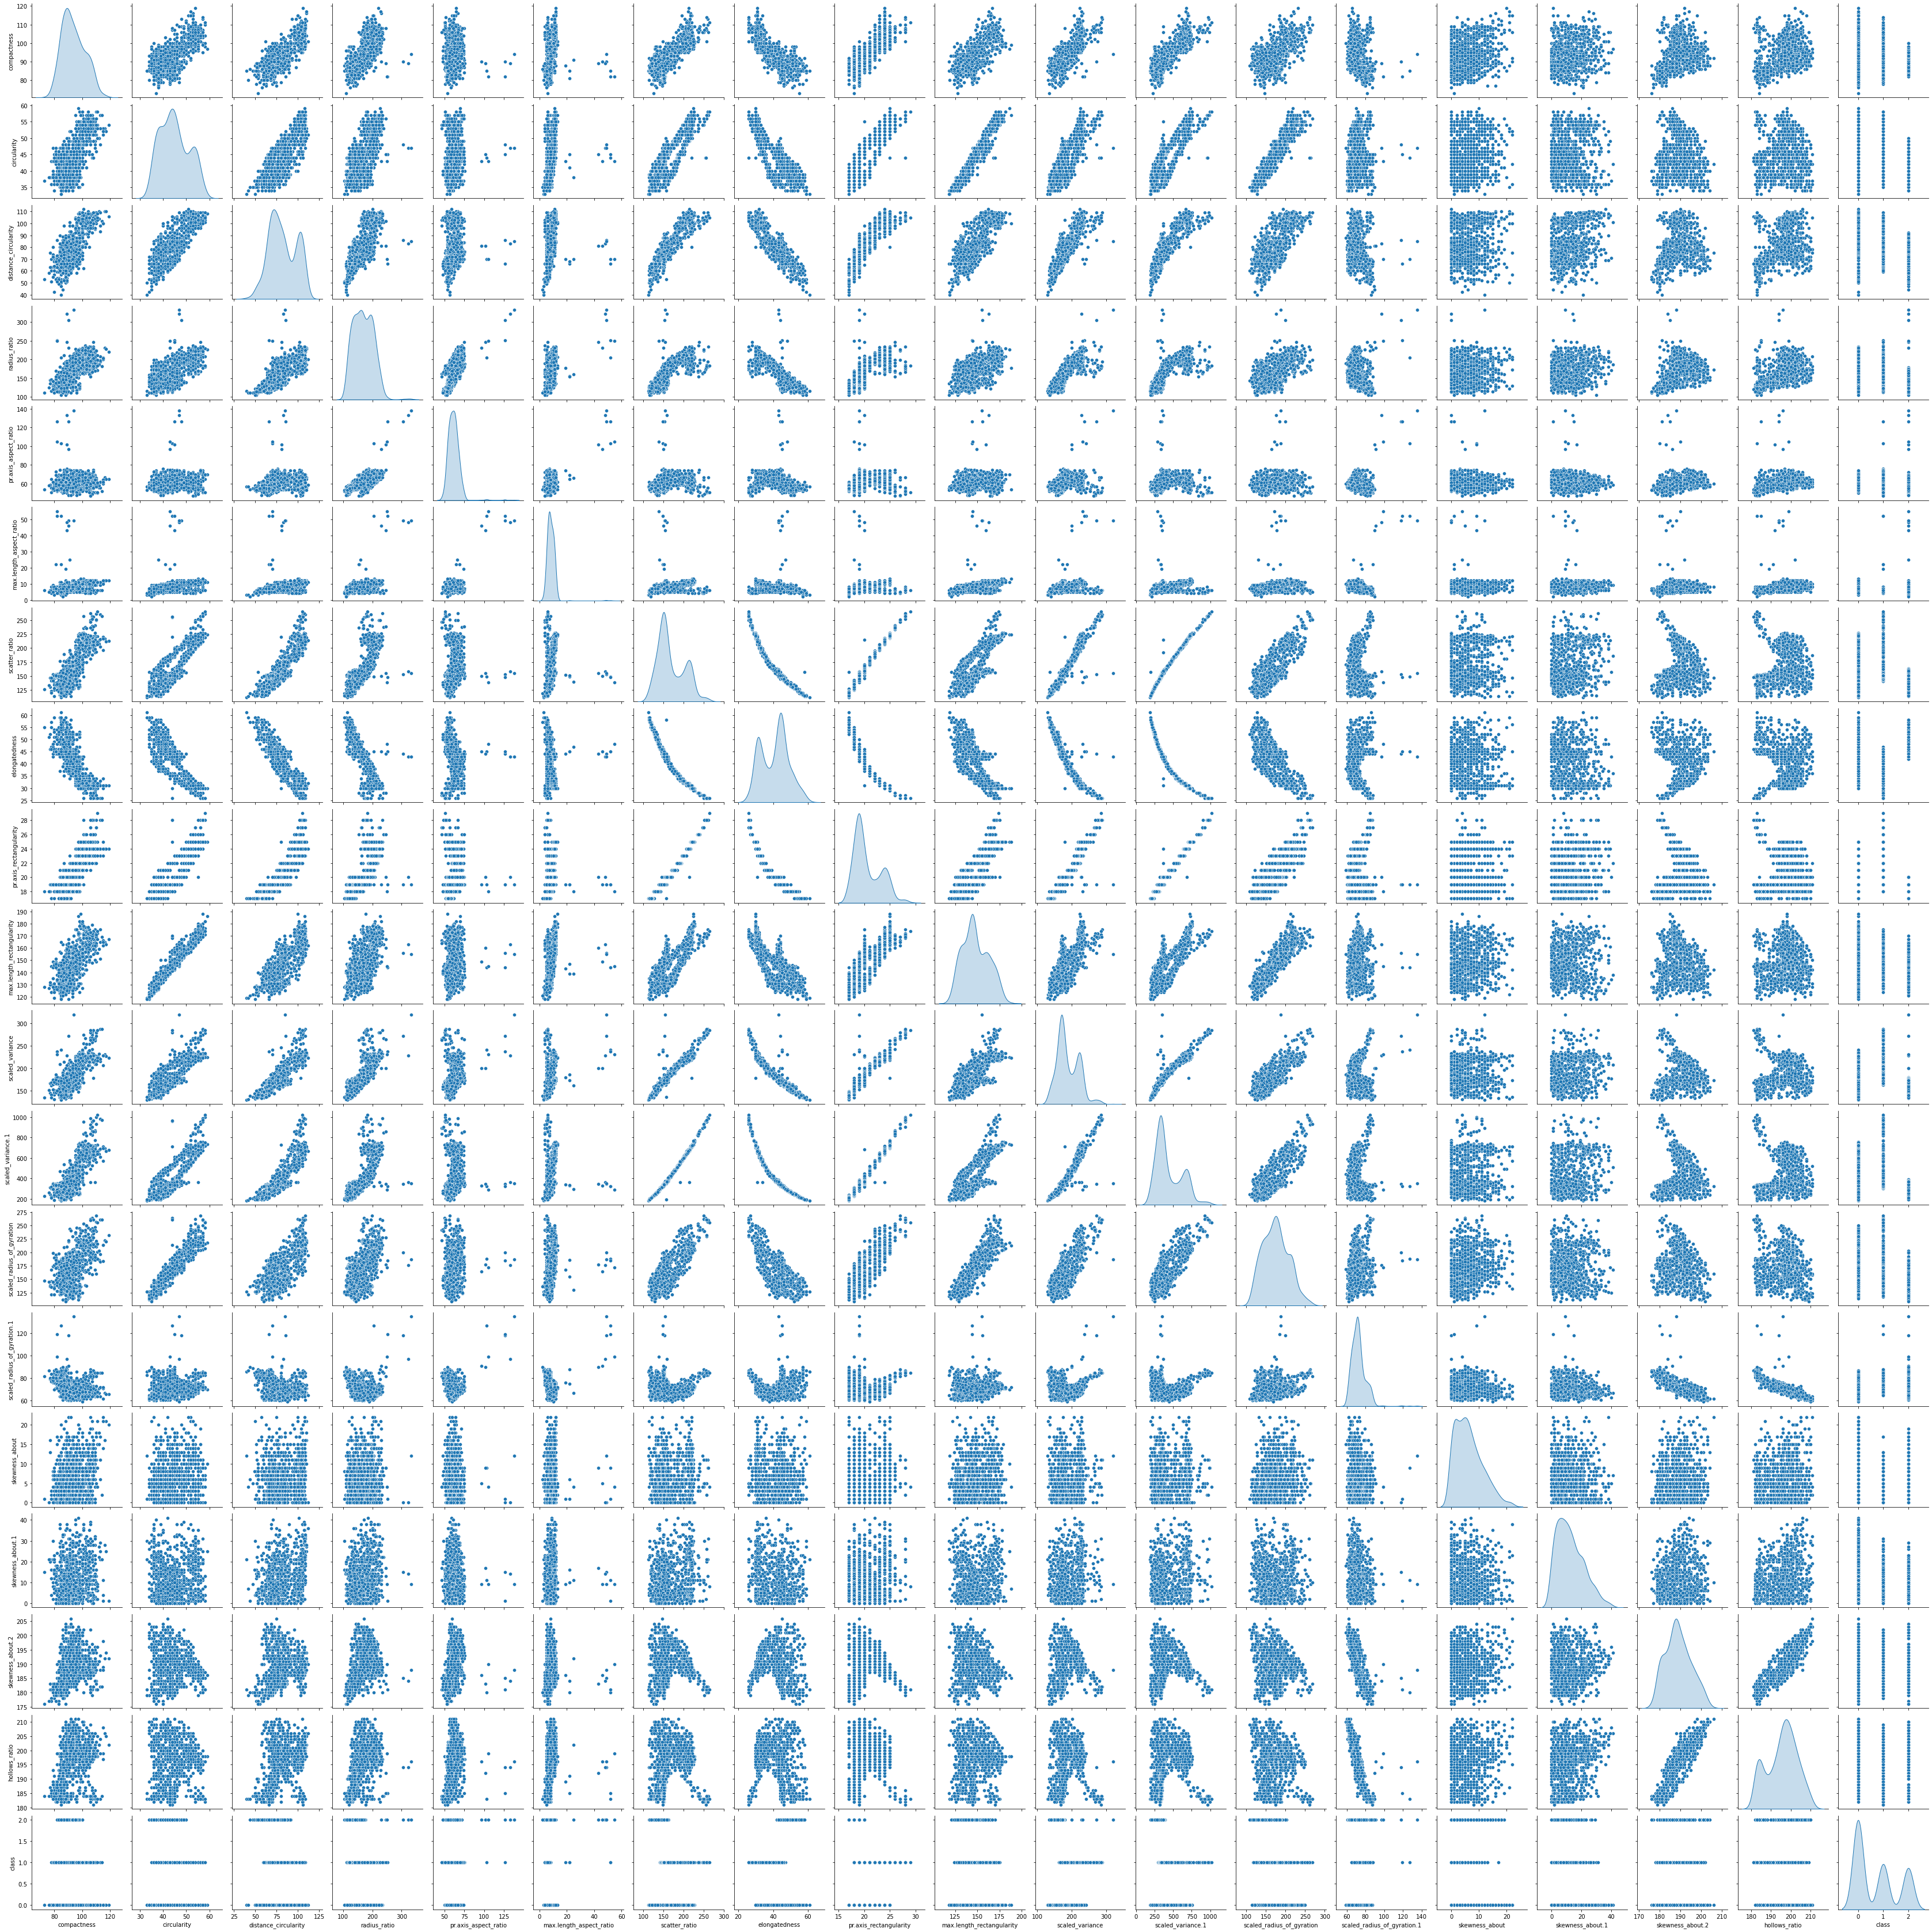

In [230]:
sns.pairplot(veh_df,diag_kind='kde')

Observations:
    1. From above pair plots,we can see that many columns are correlated among them, this leads to multi-collinearity and many 
    columns have long tail so that is the indication of outliers. 

<AxesSubplot:>

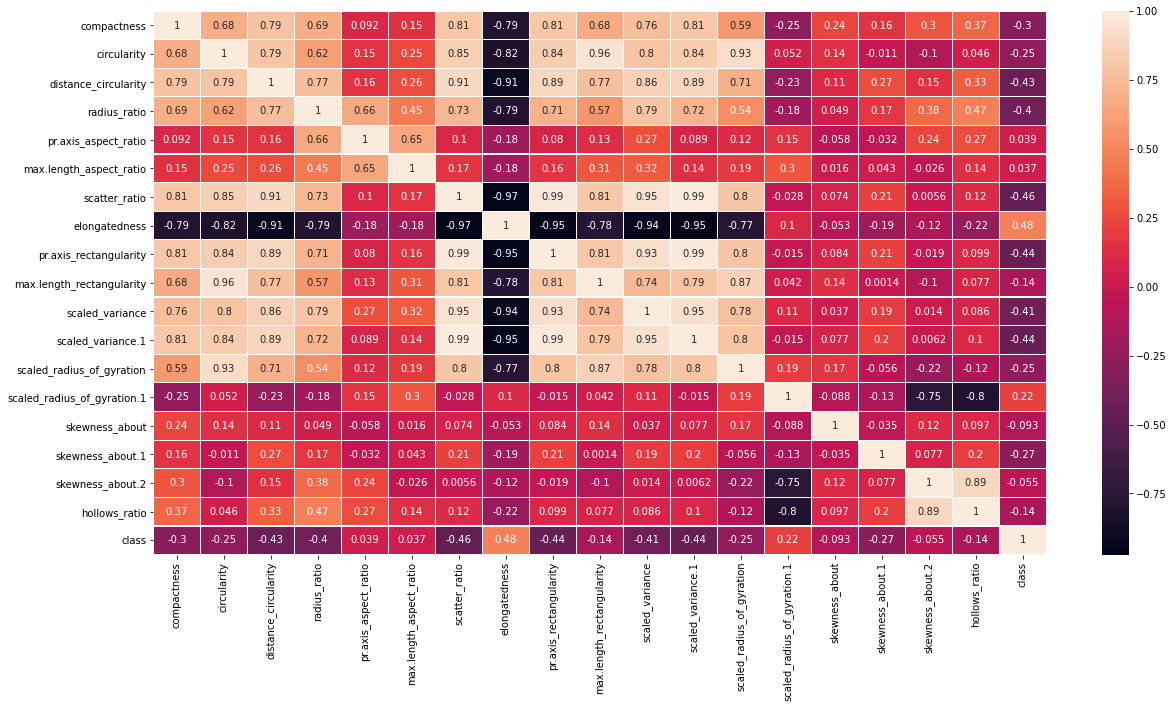

In [231]:
fig=plt.subplots(figsize=(20,10))
sns.heatmap(veh_df.corr(),annot=True,linewidth=0.2)

Observations:
    1. From above correlation matrix, we can see that there are many features which are highly correlated. If we see carefully 
    then scatter ration & scaled_variance.1 has almost perfect positive linear relationship and many othe features also there 
    whcih having more than 0.9(positive and negative) correlation and it is difficult to determine which dimensions to drop manually.
    2. so, or objective is to recognise whether an object is a van or bus or car based on some input features. Our main assumption 
    is there is little or no multicollinearity between the features. All the features should be independent with one another, if two
    features are highly correlated then there is no use in using both features.
    3. As we have seen in the distribution plots, we have outliers in some columns and we can remove those outliers or we will apply 
    PCA and let PCA to be decalred how it will explain above data which is high dimension with samller number of variables and 
    luckily it removes multicollinearity as well.
    4. We can drop the variables which are highly correlated with each other by setting threshold and also hypothesis test can be
    implemented on all these variables can be removed which are having p-value more than 0.05
    5. since we are going to implement PCA technique, it will take care multicollinearity and gives us the variables which are 
    independent to each other.
    

In [232]:
corre_values=veh_df.corr()['class']
pd.DataFrame(corre_values.sort_values(ascending=False))

class
class                        1.000000
elongatedness                0.483027
scaled_radius_of_gyration.1  0.221288
pr.axis_aspect_ratio         0.038686
max.length_aspect_ratio      0.036942
skewness_about.2            -0.054732
skewness_about              -0.092882
max.length_rectangularity   -0.140152
hollows_ratio               -0.142852
scaled_radius_of_gyration   -0.247735
circularity                 -0.251281
skewness_about.1            -0.271465
compactness                 -0.297774
radius_ratio                -0.402095
scaled_variance             -0.407685
distance_circularity        -0.428523
scaled_variance.1           -0.443226
pr.axis_rectangularity      -0.444586
scatter_ratio               -0.463566

Observations:
    1.With above correlation dataframe, we can observe that only top 4 columns has positive correlation with the target variable
    and rest are having negative correlation,

### SVC Model

In [233]:
X=veh_df.iloc[:,0:18]
y=veh_df['class']

In [234]:
# We are scaling the numeric attributes before spliting for training and testing
from scipy.stats import zscore
XScaled=X.apply(zscore) #convert all attributes to z scale
XScaled.describe()

compactness   circularity  distance_circularity  radius_ratio  \
count  8.460000e+02  8.460000e+02          8.460000e+02  8.460000e+02   
mean   5.572112e-16 -1.018361e-16          2.370051e-16  8.871286e-17   
std    1.000592e+00  1.000592e+00          1.000592e+00  1.000592e+00   
min   -2.512695e+00 -1.928651e+00         -2.676060e+00 -1.943427e+00   
25%   -8.115196e-01 -7.868465e-01         -7.691502e-01 -8.350318e-01   
50%   -8.244465e-02 -1.343867e-01         -1.335137e-01 -5.615980e-02   
75%    7.681428e-01  6.811881e-01          1.010632e+00  7.826254e-01   
max    3.076880e+00  2.312338e+00          1.900523e+00  4.916638e+00   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count          8.460000e+02             8.460000e+02   8.460000e+02   
mean           3.732239e-16            -2.036721e-16  -4.391024e-16   
std            1.000592e+00             1.000592e+00   1.000592e+00   
min           -1.863187e+00            -1.428157e+00  -1.714617e+00   
25%           -5.937529e-01            -3.408453e-01  -6.597038e-01   
50%           -8.597938e-02            -1.233829e-01  -3.583000e-01   
75%            4.217941e-01             3.115419e-01   8.774555e-01   
max            9.688661e+00             1.009735e+01   2.896861e+00   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count   8.460000e+02            8.460000e+02               8.460000e+02   
mean   -8.582575e-17           -4.320159e-16               7.968409e-16   
std     1.000592e+00            1.000592e+00               1.000592e+00   
min    -1.913112e+00           -1.383974e+00              -2.067876e+00   
25%    -1.016511e+00           -6.108857e-01              -7.581695e-01   
50%     2.643474e-01           -2.243417e-01              -1.377823e-01   
75%     6.486049e-01            9.352903e-01               7.583325e-01   
max     2.569893e+00            3.254554e+00               2.757358e+00   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count     8.460000e+02       8.460000e+02               8.460000e+02   
mean     -8.845039e-17      -1.057730e-16               1.742761e-16   
std       1.000592e+00       1.000592e+00               1.000592e+00   
min      -1.869604e+00      -1.447426e+00              -2.020069e+00   
25%      -6.890755e-01      -6.863374e-01              -7.903227e-01   
50%      -3.062013e-01      -4.298065e-01              -3.710316e-02   
75%       9.062337e-01       8.358405e-01               7.161164e-01   
max       4.192571e+00       3.280679e+00               2.868172e+00   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                 8.460000e+02    8.460000e+02      8.460000e+02   
mean                 -1.785904e-16   -2.782119e-17     -3.910715e-17   
std                   1.000592e+00    1.000592e+00      1.000592e+00   
min                  -1.801003e+00   -1.298215e+00     -1.411710e+00   
25%                  -7.292377e-01   -8.900807e-01     -8.515285e-01   
50%                  -1.263695e-01   -7.381157e-02     -1.793110e-01   
75%                   3.425279e-01    5.383902e-01      7.169791e-01   
max                   8.380770e+00    3.191265e+00      3.181777e+00   

       skewness_about.2  hollows_ratio  
count      8.460000e+02   8.460000e+02  
mean      -1.370850e-15   1.544470e-15  
std        1.000592e+00   1.000592e+00  
min       -2.101034e+00  -1.968200e+00  
25%       -7.999271e-01  -7.239842e-01  
50%       -1.493736e-01   1.839573e-01  
75%        6.638184e-01   7.219967e-01  
max        2.778117e+00   2.067095e+00

In [235]:
# Split X and y into training and test set in 70:30 ratio 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(XScaled,y,test_size=0.30,random_state=1)

In [236]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(592, 18)
(592,)
(254, 18)
(254,)


<AxesSubplot:>

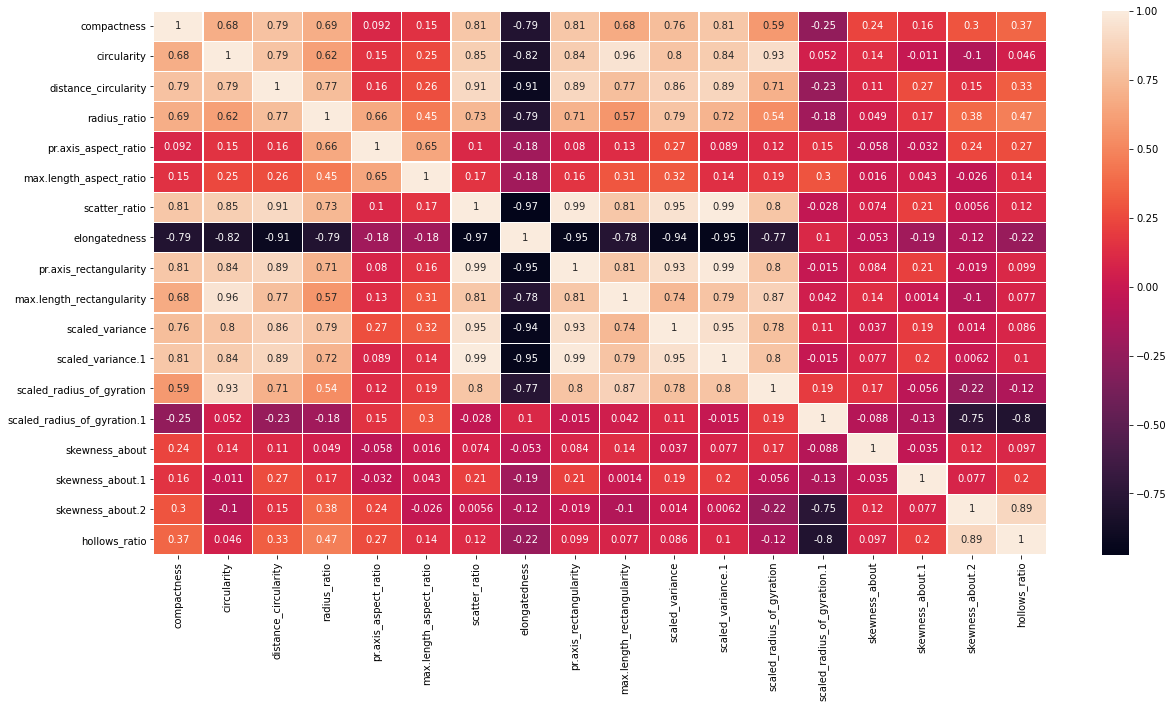

In [237]:
fig=plt.subplots(figsize=(20,10))
sns.heatmap(XScaled.corr(),annot=True,linewidth=0.2)

In [238]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svm_model=SVC()
svm_model.fit(X_train,y_train)
prediction=svm_model.predict(X_test)
#prediction = svc_model .predict(X_test)

In [239]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score

model_score1=svm_model.score(X_train,y_train)
print("Accuracy on training set = {:.2f}".format(model_score1))

model_score2=svm_model.score(X_test,y_test)
print("Accuracy on testing set = {:.2f}".format(model_score2))

print("")
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,prediction))

print("Classification Report:\n",metrics.classification_report(y_test,prediction))

Accuracy on training set = 0.97
Accuracy on testing set = 0.95

Confusion Matrix:
 [[129   1   3]
 [  0  58   1]
 [  2   5  55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       133
           1       0.91      0.98      0.94        59
           2       0.93      0.89      0.91        62

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254



In [240]:
score_df=pd.DataFrame({'Model':'SVM','Accuracy':[model_score2]})
score_df

Model  Accuracy
0   SVM  0.952756

Perform K-fold cross validation and get the cross validation score of the model

In [241]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#number of splits(25)
num_folds=25
#initialising kfold object
kfold =KFold(n_splits=num_folds,random_state=56)
##specifying the model to perform cross validation
model=SVC()
#Accuracy scores of all the 25 splits run
scores=cross_val_score(model,XScaled,y,cv=kfold)
#printing all the 25 scores
print(scores)
print(' ')
#Here we are getting average accuracy with standard deviation for range estimate
#ovr_score=
print('Overall Accuracy:{:.2f}% ({:.2f}%)'.format(scores.mean()*100.0,scores.std()*100.0))

[0.88235294 0.97058824 0.97058824 0.94117647 0.97058824 0.97058824
 0.94117647 1.         0.97058824 1.         0.97058824 0.97058824
 0.97058824 0.97058824 0.97058824 1.         0.97058824 0.97058824
 0.94117647 1.         0.94117647 0.96969697 0.96969697 0.93939394
 0.96969697]
 
Overall Accuracy:96.57% (2.46%)


In [242]:
score_df1=pd.DataFrame({'Model':['SVM(cross_val)'],'Accuracy':[scores.mean()]})
score_df=pd.concat([score_df,score_df1]).drop_duplicates()
score_df

Model  Accuracy
0             SVM  0.952756
0  SVM(cross_val)  0.965704

Here we are getting higher accuracy. By seeing average of all the 25 cross validation scores, we can say that our model would
perform between 91% and 100% of accuracy with 95% of the confidence interval.

Use PCA from scikit learn, extract Principal Components that capture about 95% of the variance in the data.
Principal Component Analysis is an Unsupervised machine learning technique which finds insights of data without having prior 
knowledge. It reduces data by projecting onto lower dimensional basis know as principal components.

It uses the matrix operations from linear algebra and statistics to calculate a projection of the original data into the same 
number of fewer dimensions.

Main idea of using PCA is to seek most accurate data representation in lower dimension space and it removes the noise and 
explore the hidden pattern within the data.

Steps for PCA:
    1. Normalisation/Scaling
    2. Generate covariance matrix/correlation matrix for all the dimensions
    3. Perform eigen decomposition, that is compute eigen vectors which are the principal components and the corresponding 
    eigen values which are the magnitudes of variance captured.

In [243]:
#covariance is the direction of the linear relationship between variables
# PCA
# Step 1 - Create covariance matrix

covMatrix=np.cov(XScaled.T)
print('Covariance Matrix \n%s',covMatrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.1038547

We will generate eigen values and their corresponding eigen vectors.
The eigen vectors are nothing but the principal components of our above covariance matrix and represent the axis of new feature
space whereas eigen values are the magnitude of those vectors.

In [244]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(XScaled)

PCA()

In [245]:
# Step 3- Get eigen values and eigen vector
eig_vals,eig_vecs=np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s',eig_vecs)
print('\n Eigen Values \n%s',eig_vals)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01 -1.19922479e-01  7.83843562e-02
   6.95178336e-02 -1.44875476e-01 -4.51862331e-01 -5.66136785e-01
  -4.84418105e-01 -2.60076393e-01  4.65342885e-02 -1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01 -2.48205467e-02  1.87337408e-01
  -8.50649539e-02  3.02731148e-01  2.49103387e-01 -1.79851809e-01
  -1.41569001e-02  9.80779086e-02  3.01323693e-03  2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02 -5.60143254e-02 -7.12008427e-02
   4.06645651e-02  1.38405773e-01 -7.40350569e-02  4.34748988e-01
  -1.67572478e-01 -2.05031597e-01  7.06489498e-01 -3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01  2.75074211e-01 -4.26053415e-02
  -4.61473714e-02 -

In [246]:
#Find variance and cumulative variance by each eigen vector (each principal components from 1 to 18 as there are 18 independent
#columns in our dataset)

tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("Cumulative Variance Explained",cum_var_exp)

Cumulative Variance Explained [ 52.18603365  68.9158021   79.47844095  86.02590063  91.11576952
  94.11218252  96.10354875  97.33504945  98.22626473  98.73597943
  99.10498391  99.36357011  99.5621946   99.71430385  99.82849808
  99.92791726  99.98355026 100.        ]


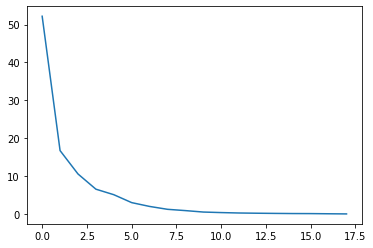

In [247]:
plt.plot(var_exp)
#plt.plot(var_exp)

Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
 We will proceed with 7 components here. But depending on requirement 90% variation or 5 components will also do good
#Visually we can observe that there is a steep drop in variance explained with increase in number of PC's
#We will proceed with 7 components here as it explains 99% of the variance.

Here, we can notice that the first principal component is a linear combination of original predictor variables which captures
the maximum variance i.e. 52% in the dataset followed by two,three and so on. It determines the direction of highest variability
in the data.

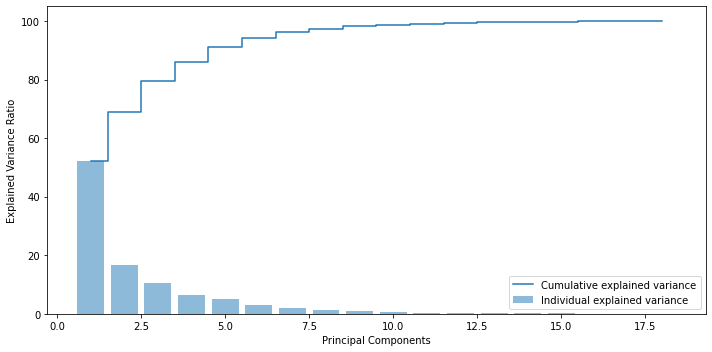

In [248]:
# Ploting 
plt.figure(figsize=(10,5))
plt.bar(range(1,eig_vals.size+1),var_exp,alpha=0.5,align='center',label='Individual explained variance')
plt.step(range(1,eig_vals.size+1),cum_var_exp,where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [249]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

#NOTE - we are generating only 7 PCA dimensions (dimenionality reduction from 18 to 7)

pca2=PCA(n_components=7)
data_reduced=pca2.fit_transform(XScaled)
data_reduced.transpose()

array([[ 3.34162030e-01, -1.59171085e+00,  3.76932418e+00, ...,
         4.80917387e+00, -3.29409242e+00, -4.76505347e+00],
       [-2.19026358e-01, -4.20602982e-01,  1.95282752e-01, ...,
        -1.24931049e-03, -1.00827615e+00,  3.34899728e-01],
       [ 1.00158417e+00, -3.69033854e-01,  8.78587404e-02, ...,
         5.32333105e-01, -3.57003198e-01, -5.68136078e-01],
       ...,
       [ 7.93007079e-02,  6.93948582e-01,  7.31732265e-01, ...,
        -1.34423635e+00,  4.27680052e-02, -5.40510367e-02],
       [-7.57446693e-01, -5.17161832e-01,  7.05041037e-01, ...,
        -2.17069763e-01, -4.02491279e-01, -3.35637136e-01],
       [-9.01124283e-01,  3.78636988e-01, -3.45837595e-02, ...,
         5.73248962e-01, -2.02405787e-01,  5.80978683e-02]])

In [250]:
# Step 3- Get eigen values (only 7)
pca2.explained_variance_

array([9.40460261, 3.01492206, 1.90352502, 1.17993747, 0.91726063,
       0.53999263, 0.35887012])

In [251]:
#Percentage of variance explained by 7 PC components
sum(pca2.explained_variance_ratio_*100)

96.1035487534536

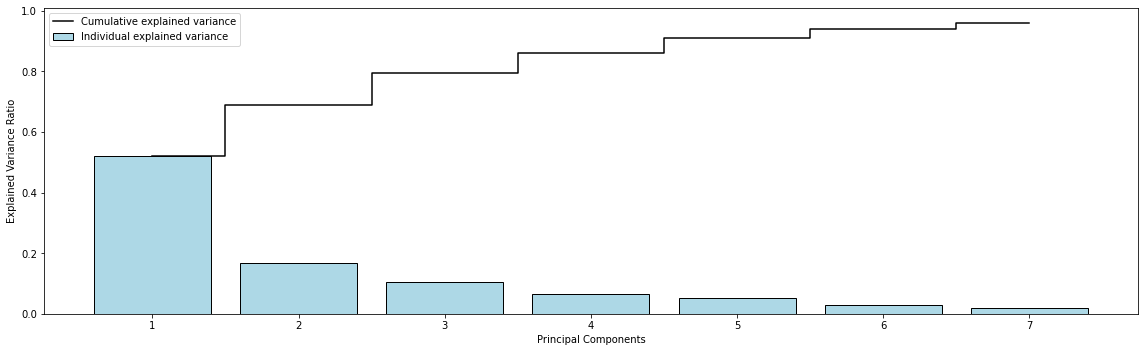

In [252]:
# Ploting 
plt.figure(figsize=(16,5))
plt.bar(range(1,8),pca2.explained_variance_ratio_,label='Individual explained variance',color='lightblue',edgecolor='black')
plt.step(range(1,8),np.cumsum(pca2.explained_variance_ratio_),where='mid',label='Cumulative explained variance',color='black')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [253]:
pca_transformed=pca2.transform(XScaled)

In [254]:
pca_transformed.shape

(846, 7)

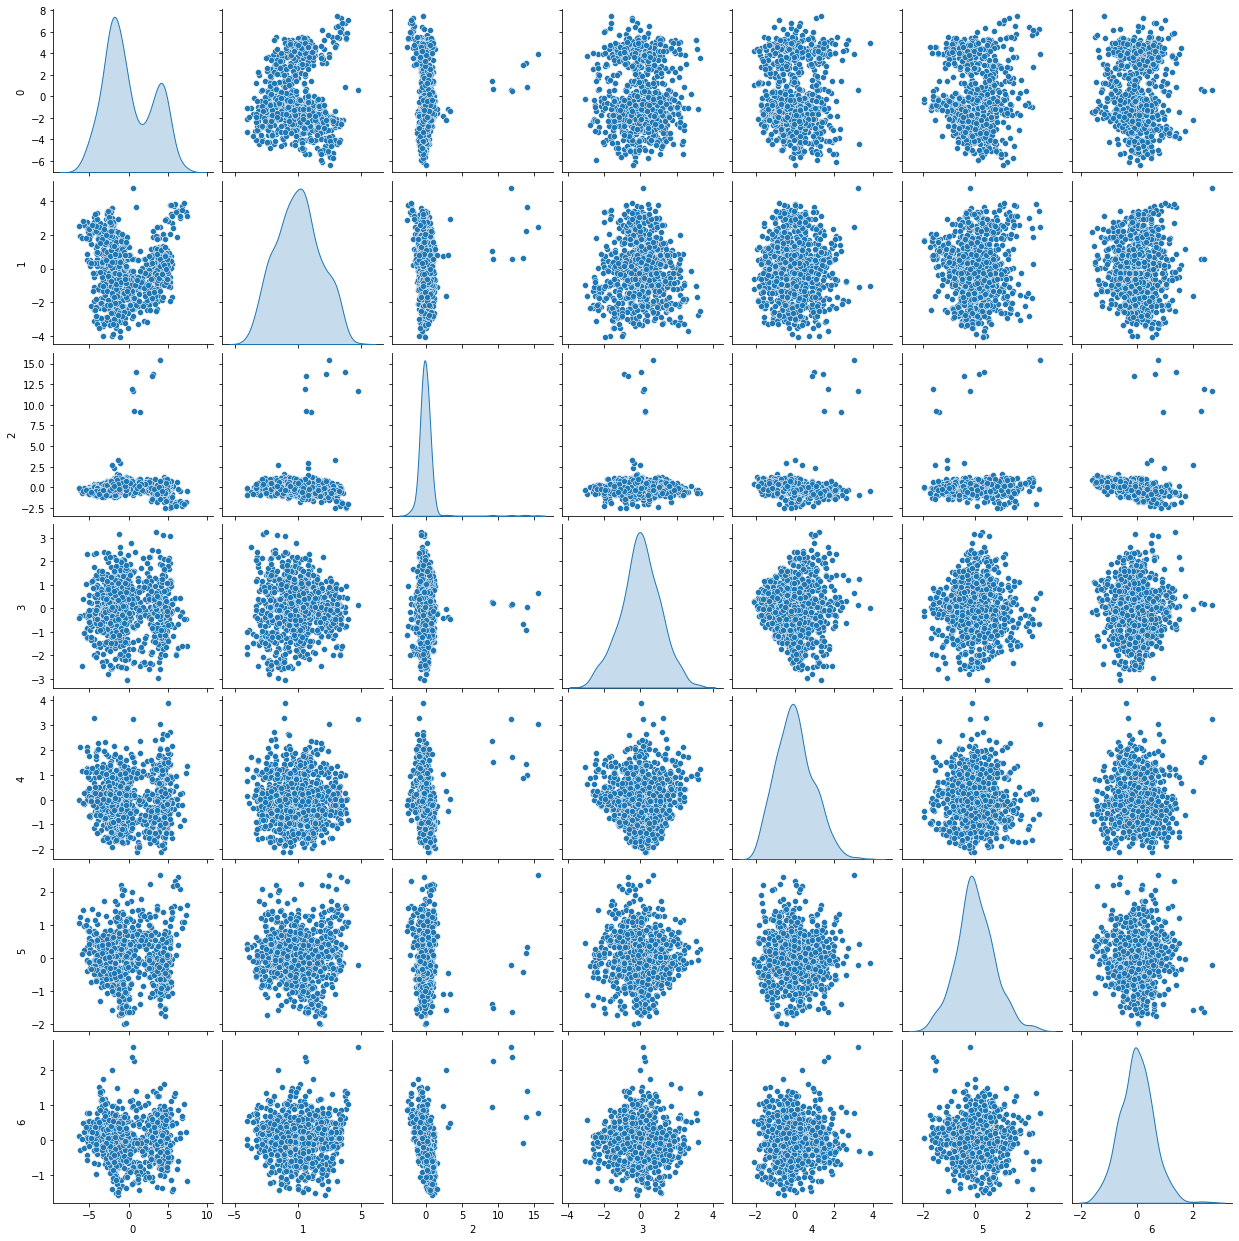

In [255]:
sns.pairplot(pd.DataFrame(pca_transformed),diag_kind='kde')

Above pairplot clearly shows that there is no collinearity between the variables, hence correlation is close to zero. So,
we could able to decrease the correlation between independent variables.
Going forward only with 7 columns we will be able to build the model which should give almost same accuracy as the model with 
18 dimesnions.

In [256]:
print('Original Data Shape')
print('Shape of x_train',X_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of x_test',X_test.shape)
print('Shape of y_test',y_test.shape)

Original Data Shape
Shape of x_train (592, 18)
Shape of y_train (592,)
Shape of x_test (254, 18)
Shape of y_test (254,)


Build the SVC model with Principal Components

In [257]:
pca_x_train,pca_x_test,pca_y_train,pca_y_test=train_test_split(pca_transformed,y,test_size=0.3,random_state=1)

In [258]:
#Shape of new train and test data
print('Transformed data using pca')
print('Shape of pca_x_train',pca_x_train.shape)
print('Shape of pca_y_train',pca_y_train.shape)
print('Shape of pca_x_test',pca_x_test.shape)
print('Shape of pca_y_test',pca_y_test.shape)

Transformed data using pca
Shape of pca_x_train (592, 7)
Shape of pca_y_train (592,)
Shape of pca_x_test (254, 7)
Shape of pca_y_test (254,)


We can observe that dimensions are reduced to 7, this is called the dimesionality reduction technique. Now, we will build the 
SVC model again and predict the score and also will compare with original data.

In [259]:
#Creating a dataframe with the new dataset
# pca_transformed is the new dataset with 7 principal components
pca_transformed=pd.DataFrame(pca_transformed,columns=veh_df.columns[0:7])
#shape of the dataframe 
print(pca_transformed.shape)
#displaying head of the dataframe 
pca_transformed.head(10)

(846, 7)


compactness  circularity  distance_circularity  radius_ratio  \
0     0.334162    -0.219026              1.001584      0.176612   
1    -1.591711    -0.420603             -0.369034      0.233234   
2     3.769324     0.195283              0.087859      1.202212   
3    -1.738598    -2.829692              0.109456      0.376685   
4     0.558103     4.758422             11.703647      0.147464   
5     5.788913     3.680602             -2.010549     -0.771052   
6    -0.773309    -2.209779             -0.124292      2.114305   
7    -2.141137    -1.176398              0.655974      0.825056   
8    -4.458273    -3.097744              0.100556     -0.551469   
9     0.937564    -1.827625             -0.076417     -0.641740   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  
0              0.079301                -0.757447      -0.901124  
1              0.693949                -0.517162       0.378637  
2              0.731732                 0.705041      -0.034584  
3             -0.362897                -0.484431       0.470753  
4              3.256953                -0.203446       2.671578  
5             -0.393432                 1.571298       1.266585  
6             -0.192185                 0.791615      -0.147108  
7             -1.242390                -0.643791      -0.137203  
8             -0.568003                -0.278121       0.291617  
9             -0.404678                -0.343602       0.661844

This is our new transformed data using PCA including 7 columns and 846 data points

In [260]:
svm_pca=SVC()
svm_pca.fit(pca_x_train,pca_y_train)
svm_pca_pred=svm_pca.predict(pca_x_test)

svm_pca_score1=svm_pca.score(pca_x_train,pca_y_train)
print("Accuracy on training set = {:.2f}".format(model_score1))

svm_pca_score2=svm_pca.score(pca_x_test,pca_y_test)
print("Accuracy on testing set = {:.2f}".format(model_score2))

print("")
print("Confusion Matrix:\n",metrics.confusion_matrix(pca_y_test,svm_pca_pred))

print("Classification Report:\n",metrics.classification_report(pca_y_test,svm_pca_pred))

Accuracy on training set = 0.97
Accuracy on testing set = 0.95

Confusion Matrix:
 [[124   3   6]
 [  7  51   1]
 [  1   6  55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       133
           1       0.85      0.86      0.86        59
           2       0.89      0.89      0.89        62

    accuracy                           0.91       254
   macro avg       0.89      0.89      0.89       254
weighted avg       0.91      0.91      0.91       254



In [261]:
score_df1=pd.DataFrame({'Model':['SVM with PCA'],'Accuracy':[svm_pca.score(pca_x_test,pca_y_test)]})
score_df=pd.concat([score_df,score_df1]).drop_duplicates()
score_df

Model  Accuracy
0             SVM  0.952756
0  SVM(cross_val)  0.965704
0    SVM with PCA  0.905512

In [262]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#number of splits(25)
num_folds=25
#initialising kfold object
kfold =KFold(n_splits=num_folds,random_state=56)
##specifying the model to perform cross validation
model=SVC()
#Accuracy scores of all the 25 splits run
scores=cross_val_score(model,pca_transformed,y,cv=kfold)
#printing all the 25 scores
print(scores)
print(' ')
#Here we are getting average accuracy with standard deviation for range estimate
#ovr_score=
print('Overall Accuracy:{:.2f}% ({:.2f}%)'.format(scores.mean()*100.0,scores.std()*100.0))

[0.91176471 1.         0.91176471 0.91176471 1.         0.97058824
 0.88235294 0.94117647 0.88235294 1.         0.94117647 0.91176471
 0.91176471 0.94117647 0.97058824 0.94117647 0.91176471 0.82352941
 0.88235294 0.91176471 0.94117647 0.90909091 0.93939394 0.84848485
 0.93939394]
 
Overall Accuracy:92.55% (4.28%)


By seeing average of all the 25 cross validation scores we can say that our model would perform between 84% and 100% of accuracy
with 95%(two std) of confidence interval

In [264]:
score_df1=pd.DataFrame({'Model':['SVM(cross_val)with PCA'],'Accuracy':[scores.mean()]})
score_df=pd.concat([score_df,score_df1]).drop_duplicates()
score_df

Model  Accuracy
0                     SVM  0.952756
0          SVM(cross_val)  0.965704
0            SVM with PCA  0.905512
0  SVM(cross_val)with PCA  0.925455

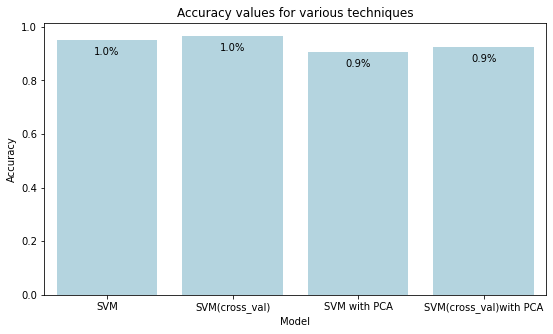

In [265]:
fig=plt.figure(figsize=(9,5))
plt.title('Accuracy values for various techniques')

ax=sns.barplot(score_df['Model'],score_df['Accuracy'],color='lightblue');

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='center',
                xytext=(0,-12),textcoords='offset points')

### 6. Conclusion: Showcase key pointer on how dimensional reduction helped in this case.

1. PCA has been implemented where we have extracted features by reducing dimensions from 18 to 7. By reducing the dimension of
feature space, we have fewer relationships between variables to consider and are less likely to overfit our model and as an 
added benefit, each of the "new" variables after PCA are all independent of one another, we saw this in pairplot of transformed 
variables with PCA.
2. Accuracy with PCA is approximately 90% and we are getting 99% of accuracy with the raw data. 
3. Cross validation seems performing well with the raw data but note that PCA 93% accuracy is with only 7 demnsions where as 
raw data has 18 dimensions. 
4. We reduced the dimensions from 18 to 7 for better accuracy.
5. By implementing PCA technique, we overcome the issue of model complexity with more number of variables but less
interpretability.

### Part 4: DOMAIN: Sports management

#### • PROJECT OBJECTIVE: Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.

In [266]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sna
import matplotlib.pyplot as plt
%matplotlib inline

In [267]:
ipl_df=pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")
#cardata = pd.read_csv("cars.csv")

In [268]:
ipl_df.size

1260

In [269]:
ipl_df.shape

(180, 7)

In [270]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 10.0+ KB


In [271]:
ipl_df.describe()

Runs        Ave          SR      Fours      Sixes         HF
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000
mean   219.933333  24.729889  119.164111  19.788889   7.577778   1.188889
std    156.253669  13.619215   23.656547  16.399845   8.001373   1.688656
min      2.000000   0.500000   18.180000   0.000000   0.000000   0.000000
25%     98.000000  14.665000  108.745000   6.250000   3.000000   0.000000
50%    196.500000  24.440000  120.135000  16.000000   6.000000   0.500000
75%    330.750000  32.195000  131.997500  28.000000  10.000000   2.000000
max    733.000000  81.330000  164.100000  73.000000  59.000000   9.000000

In [272]:
ipl_df.isnull().sum()

Name     90
Runs     90
Ave      90
SR       90
Fours    90
Sixes    90
HF       90
dtype: int64

### 1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.

<AxesSubplot:xlabel='Fours', ylabel='count'>

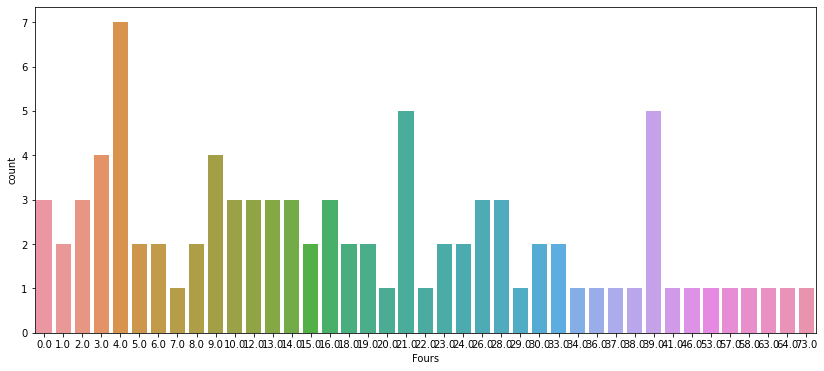

In [274]:
plt.figure(figsize=(14,6))
sns.countplot(x='Fours',data=ipl_df)

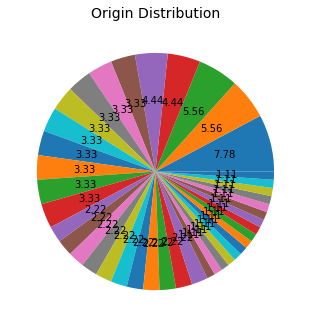

In [275]:
plt.figure(figsize=(12,12))
ax1=plt.subplot2grid((2,2),(0,0))
plt.pie(x=ipl_df['Fours'].value_counts(),autopct="%.2f")
plt.title("Origin Distribution",fontsize=14)

#ax1=plt.subplot2grid((2,2),(0,1))
#plt.pie(x=ipl_df['Sixes'].value_counts(),autopct="%.2f",labels=ipl_df['Sixes'].value_counts().keys())
#plt.title("origin Distribution",fontsize=14)
#plt.title('Cylinders',size=14)

plt.show()

In [276]:
#Who scored Maximum runs 
ipl_df['Runs'].max()

733.0

In [277]:
#How many players we have got in the dataset
ipl_df['Name'].unique()

array([nan, 'CH Gayle', 'G Gambhir', 'V Sehwag', 'CL White', 'S Dhawan',
       'AM Rahane', 'KP Pietersen', 'RG Sharma', 'AB de Villiers',
       'JP Duminy', 'DA Warner', 'SR Watson', 'F du Plessis', 'OA Shah',
       'DJ Bravo', 'DJ Hussey', 'SK Raina', 'AT Rayudu', 'Mandeep Singh',
       'R Dravid', 'DR Smith', 'M Vijay', 'SPD Smith', 'TM Dilshan',
       'RV Uthappa', 'SE Marsh', 'KA Pollard', 'DMD Jayawardene',
       'V Kohli', 'MA Agarwal', 'SR Tendulkar', 'MEK Hussey', 'JH Kallis',
       'MS Dhoni', 'MS Bisla', 'JD Ryder', 'BJ Hodge', 'NV Ojha',
       'DB Das', 'AC Gilchrist', 'BB McCullum', 'IK Pathan',
       'Azhar Mahmood', 'MK Pandey', 'S Badrinath', 'DA Miller',
       'MK Tiwary', 'JA Morkel', 'LRPL Taylor', 'M Manhas',
       'DT Christian', 'RA Jadeja', 'JEC Franklin', 'KC Sangakkara',
       'Y Nagar', 'STR Binny', 'SS Tiwary', 'KD Karthik', 'AL Menaria',
       'PA Patel', 'SC Ganguly', 'YK Pathan', 'Harbhajan Singh',
       'RE Levi', 'LR Shukla', 'Y Venugopal R

In [278]:
#Total number of players played in IPL
len(ipl_df['Name'].unique())

91

In [279]:
#Who scored maximum runs in IPL
ipl_df.iloc[ipl_df['Runs'].idxmax()]

Name     CH Gayle
Runs          733
Ave         61.08
SR         160.74
Fours          46
Sixes          59
HF              9
Name: 1, dtype: object

In [280]:
#Who scored maximum average runs per match in IPL
ipl_df.iloc[ipl_df['Ave'].idxmax()]

Name     JP Duminy
Runs           244
Ave          81.33
SR          128.42
Fours           13
Sixes           11
HF               2
Name: 19, dtype: object

In [281]:
#Who scored maximum strike rate in IPL
ipl_df.iloc[ipl_df['SR'].idxmax()]

Name     DA Warner
Runs           256
Ave          36.57
SR           164.1
Fours           28
Sixes           14
HF               3
Name: 21, dtype: object

In [282]:
#Who scored maximum Fours in IPL
ipl_df.iloc[ipl_df['Fours'].idxmax()]

Name     AM Rahane
Runs           560
Ave             40
SR          129.33
Fours           73
Sixes           10
HF               5
Name: 11, dtype: object

In [283]:
#Who scored maximum sixes in IPL
ipl_df.iloc[ipl_df['Sixes'].idxmax()]

Name     CH Gayle
Runs          733
Ave         61.08
SR         160.74
Fours          46
Sixes          59
HF              9
Name: 1, dtype: object

In [284]:
#Who scored highest number of half century in IPL
ipl_df.iloc[ipl_df['HF'].idxmax()]

Name     CH Gayle
Runs          733
Ave         61.08
SR         160.74
Fours          46
Sixes          59
HF              9
Name: 1, dtype: object

In [285]:
#Which player scored highest runs with highest strike rate
ipl_df.iloc[ipl_df[ipl_df['Runs'].ge(1)].SR.idxmax()]

Name     DA Warner
Runs           256
Ave          36.57
SR           164.1
Fours           28
Sixes           14
HF               3
Name: 21, dtype: object

In [286]:
#Which player scored highest runs with highest half century
ipl_df.iloc[ipl_df[ipl_df['Runs'].ge(1)].HF.idxmax()]

Name     CH Gayle
Runs          733
Ave         61.08
SR         160.74
Fours          46
Sixes          59
HF              9
Name: 1, dtype: object

In [287]:
#Which player scored highest runs with highest Fours
ipl_df.iloc[ipl_df[ipl_df['Runs'].ge(1)].Fours.idxmax()]

Name     AM Rahane
Runs           560
Ave             40
SR          129.33
Fours           73
Sixes           10
HF               5
Name: 11, dtype: object

In [288]:
#Which player scored highest runs with highest Sixes
ipl_df.iloc[ipl_df[ipl_df['Runs'].ge(1)].Sixes.idxmax()]

Name     CH Gayle
Runs          733
Ave         61.08
SR         160.74
Fours          46
Sixes          59
HF              9
Name: 1, dtype: object

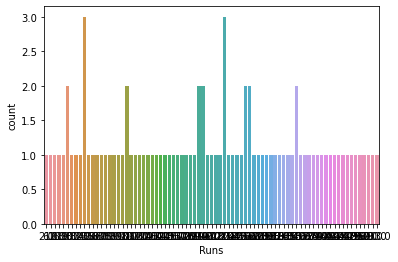

In [289]:
#Which player has hoghest runs
sns.countplot(x='Runs',data=ipl_df)
plt.show()

<AxesSubplot:xlabel='Runs'>

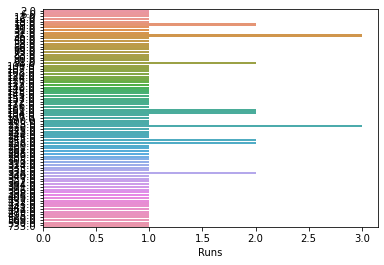

In [290]:
data=ipl_df.Runs.value_counts()
sns.barplot(y=data.index,x=data,orient='h')

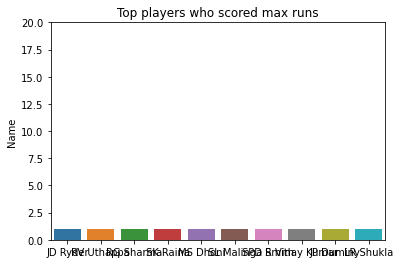

In [291]:
top_players=ipl_df.Name.value_counts()[:10]
fig,ax=plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top players who scored max runs")
sns.barplot(x=top_players.index,y=top_players,orient='v')
plt.show()

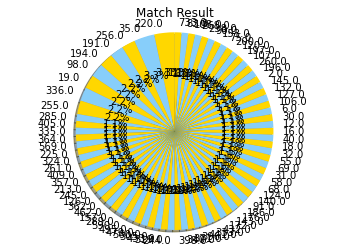

In [292]:
match=ipl_df.Runs.value_counts()
labels=np.array(match.index)
sizes=match.values
colors=['gold','lightskyblue']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Match Result')
plt.axis('equal')
plt.show()

In [293]:
# Check for correlation of variable
ipl_df.corr()
#data_df.corr(method='pearson')

Runs       Ave        SR     Fours     Sixes        HF
Runs   1.000000  0.692984  0.493489  0.918809  0.769778  0.835148
Ave    0.692984  1.000000  0.623606  0.546211  0.682414  0.620754
SR     0.493489  0.623606  1.000000  0.384810  0.583943  0.427584
Fours  0.918809  0.546211  0.384810  1.000000  0.522574  0.783689
Sixes  0.769778  0.682414  0.583943  0.522574  1.000000  0.767696
HF     0.835148  0.620754  0.427584  0.783689  0.767696  1.000000

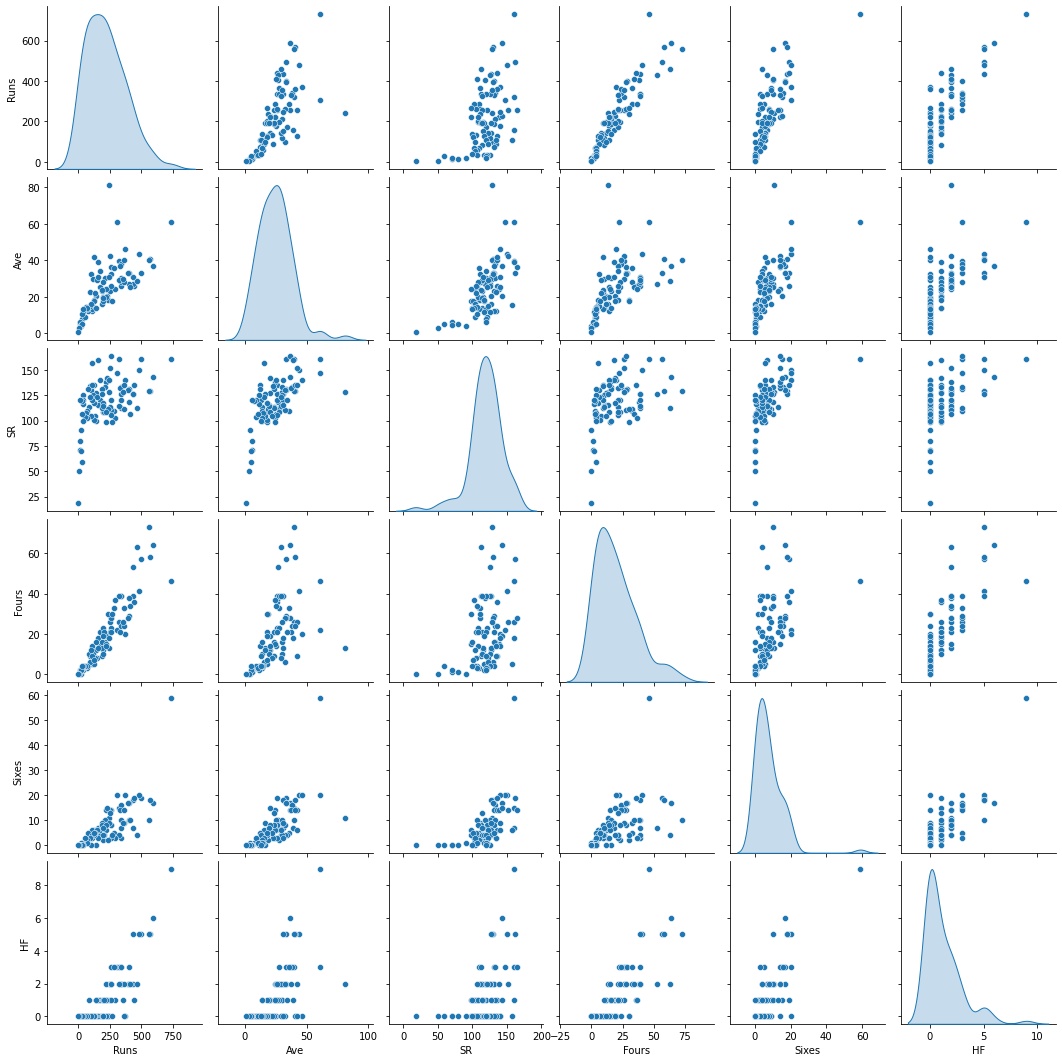

In [294]:
sns.pairplot(ipl_df,diag_kind='kde')

In [296]:
# We could see few outliers here. Possible mode of imputation:
# Remove the outliers by taking anything above 3 sd from mean
# Take logarithmic transformation, it would reduce the variation
# Group few levels
#pd.crosstab(data_df['Marginal Adhesion'], data_df['Class'])

In [297]:
ipl_df=ipl_df.dropna(axis=0)
ipl_df

Name   Runs    Ave      SR  Fours  Sixes   HF
1       CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
3      G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
5       V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
7       CL White  479.0  43.54  149.68   41.0   20.0  5.0
9       S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0
..           ...    ...    ...     ...    ...    ...  ...
171       Z Khan   12.0   6.00   70.58    1.0    0.0  0.0
173   WD Parnell   19.0   4.75   70.37    2.0    0.0  0.0
175  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0
177     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0
179     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0

[90 rows x 7 columns]

In [298]:
# Drop id and class variables

ipl_df = ipl_df.drop(['Name'], axis =1)

ipl_df.head()


Runs    Ave      SR  Fours  Sixes   HF
1  733.0  61.08  160.74   46.0   59.0  9.0
3  590.0  36.87  143.55   64.0   17.0  6.0
5  495.0  33.00  161.23   57.0   19.0  5.0
7  479.0  43.54  149.68   41.0   20.0  5.0
9  569.0  40.64  129.61   58.0   18.0  5.0

In [299]:
# All variables are on same scale, hence we can omit scaling.
# But to standardize the process we will do it here

from scipy.stats import zscore
ipl_df=ipl_df.apply(zscore)
ipl_df.head()

Runs       Ave        SR     Fours     Sixes        HF
1  3.301945  2.683984  1.767325  1.607207  6.462679  4.651551
3  2.381639  0.896390  1.036605  2.710928  1.184173  2.865038
5  1.770248  0.610640  1.788154  2.281703  1.435530  2.269533
7  1.667276  1.388883  1.297182  1.300618  1.561209  2.269533
9  2.246490  1.174755  0.444038  2.343021  1.309851  2.269533

<AxesSubplot:>

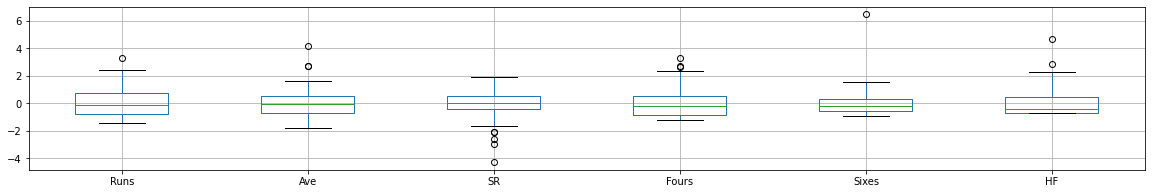

In [300]:
# We could see most of the outliers are now removed.
ipl_df.boxplot(figsize=(20,3))

In [301]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(ipl_df.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [302]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.4582608  -0.26643209 -0.70483594 -0.45840889  0.10977942  0.00520142]
 [-0.39797313  0.33111756  0.0606373   0.10122837 -0.00550486 -0.84736307]
 [-0.3253838   0.69780334 -0.05624934  0.11890348  0.45013448  0.43275029]
 [-0.40574167 -0.47355804  0.58514214 -0.09676885  0.50823538  0.03252305]
 [-0.41733459  0.17902455  0.35786211 -0.39458014 -0.66942589  0.24878157]
 [-0.43237178 -0.27593225 -0.16096217  0.77486668 -0.28082541  0.17811777]]

 Eigen Values 
%s [4.30252561 0.83636692 0.01706297 0.16567829 0.41665751 0.32912443]


In [303]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 70.91199612  84.696562    91.56369501  96.98815324  99.71877694
 100.        ]


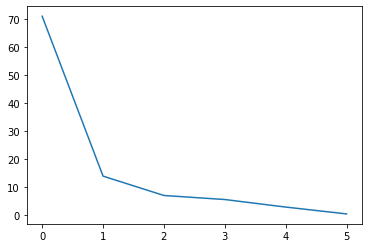

In [304]:
plt.plot(var_exp)

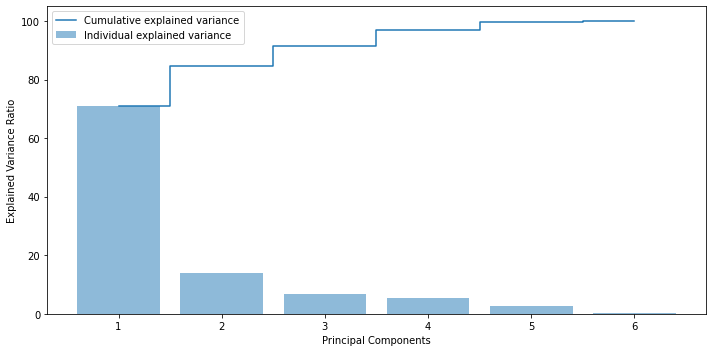

In [305]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

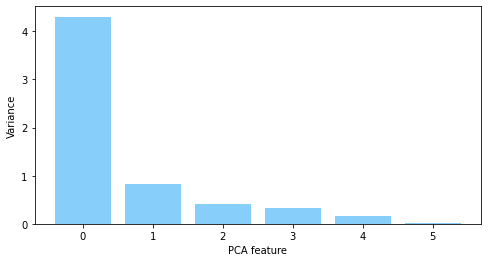

In [307]:
pca = PCA(random_state=123)
pca.fit(ipl_df)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()


In [315]:
pca = PCA(n_components=5)
data_reduced = pca.fit_transform(ipl_df)
data_reduced.transpose()

array([[ 8.51677407e+00,  4.61833957e+00,  4.14225050e+00,
         3.89941107e+00,  4.12007165e+00,  4.02443639e+00,
         2.87928084e+00,  2.91901518e+00,  2.32738860e+00,
         2.08164241e+00,  2.08328069e+00,  1.77694308e+00,
         2.12516667e+00,  1.93887249e+00,  1.72763623e+00,
         1.81713174e+00,  1.86989515e+00,  1.44931719e+00,
         1.79578490e+00,  1.83452229e+00,  6.85215121e-01,
         1.28111282e+00,  1.23672458e+00,  1.03374737e+00,
         1.38634619e+00,  1.18109656e+00,  6.83733764e-01,
         1.04356191e+00,  1.02916835e+00,  5.31600143e-01,
         8.79975608e-01,  6.69649571e-01,  1.09641905e+00,
         8.60130959e-01,  3.23934646e-01,  4.64752278e-01,
         2.59177125e-01,  2.49989381e-01, -2.01159757e-01,
        -4.80708428e-02,  8.83086002e-02, -3.66643469e-01,
        -3.58365065e-01, -5.61061987e-01, -3.86336339e-01,
        -8.04401297e-01, -2.89487887e-01, -8.39387148e-01,
        -5.42990188e-01, -7.96452566e-01, -7.26288054e-0

### Part 5:
1. List down all possible dimensionality reduction techniques that can be implemented using python.

1. Missing Value Ratio
2. Low Variance Filter
3. High Correlation Filter
4. Random Forest
5. Backward Feature Elimination
6. Forward Feature Selection
7. Facotr Analysis
8. Principal Component Analysis(PCA)
9. Independent Component Analysis(ICA)
10. Methods Based on Projections
11. t-Distributed Stochastic Neighbors Embedding(t-SNE)
12. Uniform Manifold Approximation and Projection(UMAP)

### 2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python.

1. The idea of PCA is to reduce the variables in the dataset and preserve data as much as possible. It gives good accuracy rate.
2. The image is a compbination of pixels in rows placed one after another to form one single image each pixel value represents 
the intensity value of the image, so if you have multiple images we can form a matrix considering a row of pixels as a vector.
It requires huge amounts of storage while working with many images where we are using PCA is used to compress it and preserve
the data as much as possible.

- For dmiensional reduction on multimedia data. PFB approach for dimensional reduction for images: 
    

In [87]:
#Import images into python using PIL or any other python image library
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

X=np.load('X.npy')
Y=np.load('Y.npy')
X.shape

(2062, 64, 64)

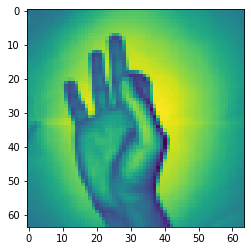

In [88]:
#Display the image - actual
plt.imshow(X[0])

In [89]:
#Display the image - matrix (hint: Image is a MXN matrix of number )
#the Y dataset here gives us the labels for these images, it's kind of weirdly ordered and this image represents the number
9-np.argmax(Y[0])
#9 - np.argmax(Y[0])

9

In [91]:
#SL algorithms require a MxN dataframe to classify. Whereas here a single image is MxN, hence making it difficult for SL algorithm to intake data. 
#Hint solution: Flatten each image i.e. MxN ---> 1X(M*N)

X_flat=np.array(X).reshape((2062,64*64))
X_train,X_test,y_train,y_test=train_test_split(X_flat,Y,test_size=0.3,random_state=42)

#X_flat = np.array(X).reshape((2062, 64*64))
#X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.3, random_state=42)

In [115]:
#Apply SL algorithm like KNN or SVM or any other algorithm of your choice. Note the accuracy (A1)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#instantiate learning model(k=3)
knn=KNeighborsClassifier(n_neighbors=3)
#fitting the model
knn.fit(X_train, y_train)
#predict the response
y_pred=knn.predict(X_test)
#evaluate accuracy
A1=accuracy_score(y_test, y_pred)
print("accuracy: " + str(A1))

accuracy: 0.6106623586429726


In [97]:
# Use the image matrix to perform pPCA on it. 
pca_dims=PCA()
pca_dims.fit(X_train)
cumsum=np.cumsum(pca_dims.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
d
#pca_dims = PCA()
#pca_dims.fit(X_train)
#cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
#d = np.argmax(cumsum >= 0.95) + 1

292

so we've gone from 4096 dimensions to just 292! But how good is this actually?
Let's train PCA on our training set and transform the data, then print out an example

In [98]:
pca=PCA(n_components=d)
X_reduced=pca.fit_transform(X_train)
X_recovered=pca.inverse_transform(X_reduced)
#pca = PCA(n_components=d)
#X_reduced = pca.fit_transform(X_train)
#X_recovered = pca.inverse_transform(X_reduced)

In [99]:
print('Reduced shape:'+str(X_reduced.shape))
print('Recovered shape'+str(X_recovered.shape))
#print("reduced shape: " + str(X_reduced.shape))
#print("recovered shape: " + str(X_recovered.shape))

Reduced shape:(1443, 292)
Recovered shape(1443, 4096)


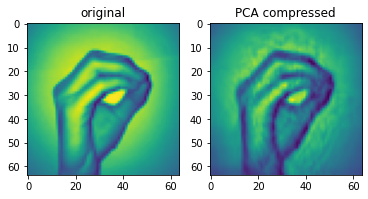

In [100]:
f=plt.figure()
f.add_subplot(1,2,1)
plt.title("original")
plt.imshow(X_train[0].reshape((64,64)))
f.add_subplot(1,2,2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((64,64)))
plt.show(block=True)

#f = plt.figure()
#f.add_subplot(1,2, 1)
#plt.title("original")
#plt.imshow(X_train[0].reshape((64,64)))
#f.add_subplot(1,2, 2)

#plt.title("PCA compressed")
#plt.imshow(X_recovered[0].reshape((64,64)))
#plt.show(block=True)

In [111]:
#Apply the same SL algorithm as used above on the dimensionally reduced data . Note the accuracy (A2)
knn_reduced=KNeighborsClassifier(n_neighbors=3)
knn_reduced.fit(X_reduced, y_train)


KNeighborsClassifier(n_neighbors=3)

In [114]:
X_test_reduced = pca.transform(X_test)
y_pred_reduced = knn_reduced.predict(X_test_reduced)
A2=accuracy_score(y_test, y_pred_reduced)
print("accuracy: " + str(A2))

accuracy: 0.6106623586429726


#### Compare A1 ~ A2. If they are similar then dimesional reduction has worked on image.

In [116]:
models=pd.DataFrame({'Model':['KNN','KNN with PCA'],
                    'Accuracy Score':[A1,A2]
                    })
models.sort_index()

Model  Accuracy Score
0           KNN        0.610662
1  KNN with PCA        0.610662

#### Conclusion: Accuracy of KNN and Accuracy of KNN with PCA are same that means dimension reduction technique PCA has worked on  image.